# Tutorial: Single-cell RNA seq analysis using a T cell dataset (sorted from healthy PBMCs) 

#### This tutorial will show you the steps involved to get you started on single cell analysis in Python using Scanpy, the toolkit for analysing single-cell gene expression.
#### It includes preprocessing, visualization, clustering, trajectory inference and differential expression testing. 
#### Depending on the complexity of your analysis, you may need to modify and expand on these steps.

### Prerequisites:
#### List of necessary libraries and installations (e.g., scanpy, anndata, seurat, pandas) -> refer to the code under Import for other specific ones for this tutorial
#### Datasets that the user needs to download or provide.

# Double-Positive T scRNAseq analysis

# 1. Preprocessing and Quality Control

##  Preprocessing

#### First, import packages needed for single-cell RNA seq analysis. 
#### You can insert another line: pip install _____ or install them via Anaconda if those packages are not already installed prior to importing

In [1]:
import os
import tools
import scanpy as sc
import pandas as pd
import dandelion as ddl
from tqdm import tqdm

#### Show current directory:

In [2]:
os.getcwd()

'/Users/nicoleanngunn/Documents/GitHub/scRNAseq-tutorial/notebook'

#### Print software versions:

In [3]:
sc.logging.print_header()

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


scanpy==1.9.3 anndata==0.9.2 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==2.0.0 scikit-learn==1.2.2 statsmodels==0.14.0 igraph==0.10.4 pynndescent==0.5.10


In [4]:
# print dandelion version
ddl.logging.print_header()

dandelion==0.3.3 pandas==2.0.0 numpy==1.23.5 matplotlib==3.7.1 networkx==3.1 scipy==1.10.1


In [5]:
## set fig params..

sc.settings.set_figure_params(dpi=80, facecolor= "white")

In [6]:
#### Pre-processing has been done by Kelvin in his notebooks

#### These are steps for reading in the raw data - don't run this!

#RAWFOLDER = "/QRISdata/Q5688/GONZ-0001_run2/count"
# also specify the names of the folders (sans _GEX for simplicity)
#samples = [
#    "CD4_L01",
#    "CD4_P01",
#    "CD4_WY",
#    "CD8_L01",
#    "CD8_P01",
#    "CD8_WY",
#    "DP_L01",
#    "DP_P01",
#    "DP_WY",
#    "V_CD4",
#    "V_CD8",
#    "V_DP",
#]

# each is an individual run where it is donor_celltype, so 4 donors, 3 celltypes per donor

### use a for-loop to read in files, add them to a list and concatenate them

#from pathlib import Path

#adata_list = []  # create an empty list first
#for sample in tqdm(samples):
    # we will use Path to construct the path to the 10x file
    # you can also just use
    # file_path = "/QRISdata/Q5688/GONZ-0001/count/" + sample + "_GEX/outs/filtered_feature_bc_matrix.h5"
    # exactly the same
    #file_path = (
    #    Path(RAWFOLDER) / (sample + "_GEX") / "outs" / "filtered_feature_bc_matrix.h5"
    #)
    #tmp = sc.read_10x_h5(file_path)
    #tmp.var_names_make_unique()
    # update the metadata with the sample folder info
    #tmp.obs["sample"] = sample
    #if sample.split("_")[0] == "V":                  ### splitting string by "_" and selecting the first string, eg V_CD4, it will write in "sort.type" as CD4
    #    tmp.obs["sort_type"] = sample.split("_")[
    #        1
    #    ]  # split based on _ and select the second
    #    tmp.obs["donor"] = sample.split("_")[0]  # split based on _ and select the first     ### splitting string by "_" and selecting the zeroth string, eg V_CD4, it will write in "donor" as V
    #else:                  ## for every other sample that where sample.split("_")[0] does not equal V, eg CD4_L01
    #    tmp.obs["sort_type"] = sample.split("_")[                   #in this case, take zeroth string and add to sort type, so here, CD4 will be added
    #        0
    #    ]  # split based on _ and select the first
    #    tmp.obs["donor"] = sample.split("_")[                       #in this case, take first string and add to donor, so here, L01 will be added
    #        1
    #    ]  # split based on _ and select the second
    #### adjust the cell barcode name so that there won't be duplicates later
    #tmp.obs_names = [sample + "_" + n for n in tmp.obs_names]
    # generate some QC metrics
   ##### tmp.var["mt"] = tmp.var_names.str.startswith(
   #     "MT-"
    #)  # annotate the group of mitochondrial genes as 'mt'
    #sc.pp.calculate_qc_metrics(
    #    tmp, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
    #)
    ###### dandelion has a quick recipe function to quickly mark doublets and bad quality cells
    #ddl.pp.external.recipe_scanpy_qc(
    #    tmp, max_genes=10000, mito_cutoff=None, mito_startswith="MT-"
    #)
    ##### ok now append the list to include each file
    #adata_list.append(tmp)



#########concatenate
# adata = adata_list[0].concatenate(adata_list[1:], index_unique=None)               #you are selecting the zeroth adata, and then concatenating it with with the first and so on until the end
# keep only relevant columns in part of the object
#adata.var = adata.var[["gene_ids", "feature_types", "genome", "mt"]]      #feature types is from features.rsv - usually for multimodal data, here we only have genes so "Gene expression" is the only feature
#adata

### Starting with the raw datafile... 
### First connect to the path - because files are stored in RDM - make sure you are on UQ network either directly or via VPN

In [7]:
# we need to read each file separately and then concatenate them

from pathlib import Path

samples = ['CD4_L01', 'CD4_P01', 'CD4_WY', 'CD8_L01', 'CD8_P01', 'CD8_WY', 'DP_L01', 'DP_P01', 'DP_WY', 'V_CD4', 'V_CD8', 'V_DP']

# use a for loop to read in each sample and then concatenate at the end
adatas = []
for sample in samples:
    out_path = Path("../data") / (sample + "_raw.h5ad") # .. means go up one folder
    adata = sc.read_h5ad(out_path)
    adatas.append(adata)

In [8]:
#concatenate

adata = sc.concat(adatas)

In [9]:
adata
#### note: this adata has gone through some pre-processing CALCULATIONS but have NOT been filtered... 

AnnData object with n_obs × n_vars = 116772 × 36601
    obs: 'sample', 'sort_type', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'batch'
    layers: 'count'

# Quality control


These are the steps that Kelvin did to obtain some PP parameters AFTER concatenating raw output from cell ranger, BEFORE saving it as "raw_adata_v2.h5ad"

When Kelvin ran 
`ddl.pp.external.recipe_scanpy_qc(
        tmp, max_genes=10000, mito_cutoff=None, mito_startswith="MT-"
)`, he applied a quick "recipe" function from ddl to help compute PP output using these parameters in this context: {cells need to have 10,000 genes, and no mito_cutoff done}. It uses a gmm model (whatever this is) to decide which cells pass or not.. 

It then creates a "filter_rna" column to store the final outoput, whether a cell passes QC (False), or not (True). 




#### What is a way to quickly look at the cells in our metadata with the observational file?

In [10]:
adata.obs 

sample sort_type donor  n_genes_by_counts   
CD4_L01_AAACCTGAGAACTGTA-1  CD4_L01       CD4   L01                986  \
CD4_L01_AAACCTGAGAGCTATA-1  CD4_L01       CD4   L01                722   
CD4_L01_AAACCTGAGGAGCGAG-1  CD4_L01       CD4   L01                562   
CD4_L01_AAACCTGAGGCAGTCA-1  CD4_L01       CD4   L01                507   
CD4_L01_AAACCTGAGTCAAGCG-1  CD4_L01       CD4   L01                602   
...                             ...       ...   ...                ...   
V_DP_TTTGTCAGTTCGTGAT-1        V_DP        DP     V                536   
V_DP_TTTGTCATCAGCTTAG-1        V_DP        DP     V                496   
V_DP_TTTGTCATCCTTGCCA-1        V_DP        DP     V                439   
V_DP_TTTGTCATCGCCATAA-1        V_DP        DP     V                540   
V_DP_TTTGTCATCTTGTTTG-1        V_DP        DP     V                359   

                            total_counts  total_counts_mt  pct_counts_mt   
CD4_L01_AAACCTGAGAACTGTA-1        2347.0             13.0       0.553899  \
CD4_L01_AAACCTGAGAGCTATA-1        1726.0             14.0       0.811124   
CD4_L01_AAACCTGAGGAGCGAG-1        1443.0             15.0       1.039501   
CD4_L01_AAACCTGAGGCAGTCA-1        1141.0              4.0       0.350570   
CD4_L01_AAACCTGAGTCAAGCG-1        1410.0             16.0       1.134752   
...                                  ...              ...            ...   
V_DP_TTTGTCAGTTCGTGAT-1           1355.0             13.0       0.959410   
V_DP_TTTGTCATCAGCTTAG-1           1067.0              1.0       0.093721   
V_DP_TTTGTCATCCTTGCCA-1           1000.0              0.0       0.000000   
V_DP_TTTGTCATCGCCATAA-1           1165.0              0.0       0.000000   
V_DP_TTTGTCATCTTGTTTG-1            896.0              0.0       0.000000   

                            scrublet_score  n_genes   
CD4_L01_AAACCTGAGAACTGTA-1        0.182979      986  \
CD4_L01_AAACCTGAGAGCTATA-1        0.456193      722   
CD4_L01_AAACCTGAGGAGCGAG-1        0.156962      562   
CD4_L01_AAACCTGAGGCAGTCA-1        0.216129      507   
CD4_L01_AAACCTGAGTCAAGCG-1        0.408219      602   
...                                    ...      ...   
V_DP_TTTGTCAGTTCGTGAT-1           0.220339      536   
V_DP_TTTGTCATCAGCTTAG-1           0.163418      496   
V_DP_TTTGTCATCCTTGCCA-1           0.211679      439   
V_DP_TTTGTCATCGCCATAA-1           0.220339      540   
V_DP_TTTGTCATCTTGTTTG-1           0.104972      359   

                            gmm_pct_count_clusters_keep is_doublet filter_rna   
CD4_L01_AAACCTGAGAACTGTA-1                        False      False       True  \
CD4_L01_AAACCTGAGAGCTATA-1                         True      False      False   
CD4_L01_AAACCTGAGGAGCGAG-1                         True      False      False   
CD4_L01_AAACCTGAGGCAGTCA-1                         True      False      False   
CD4_L01_AAACCTGAGTCAAGCG-1                         True      False      False   
...                                                 ...        ...        ...   
V_DP_TTTGTCAGTTCGTGAT-1                           False      False       True   
V_DP_TTTGTCATCAGCTTAG-1                           False      False       True   
V_DP_TTTGTCATCCTTGCCA-1                            True      False      False   
V_DP_TTTGTCATCGCCATAA-1                            True      False      False   
V_DP_TTTGTCATCTTGTTTG-1                            True      False      False   

                           batch  
CD4_L01_AAACCTGAGAACTGTA-1     0  
CD4_L01_AAACCTGAGAGCTATA-1     0  
CD4_L01_AAACCTGAGGAGCGAG-1     0  
CD4_L01_AAACCTGAGGCAGTCA-1     0  
CD4_L01_AAACCTGAGTCAAGCG-1     0  
...                          ...  
V_DP_TTTGTCAGTTCGTGAT-1       11  
V_DP_TTTGTCATCAGCTTAG-1       11  
V_DP_TTTGTCATCCTTGCCA-1       11  
V_DP_TTTGTCATCGCCATAA-1       11  
V_DP_TTTGTCATCTTGTTTG-1       11  

[116772 rows x 13 columns]

#### What about genes in the metadata? 

Hint - in the variable level

In [11]:
adata.var

Empty DataFrame
Columns: []
Index: [MIR1302-2HG, FAM138A, OR4F5, AL627309.1, AL627309.3, AL627309.2, AL627309.5, AL627309.4, AP006222.2, AL732372.1, OR4F29, AC114498.1, OR4F16, AL669831.2, LINC01409, FAM87B, LINC01128, LINC00115, FAM41C, AL645608.6, AL645608.2, AL645608.4, LINC02593, SAMD11, NOC2L, KLHL17, PLEKHN1, PERM1, AL645608.7, HES4, ISG15, AL645608.1, AGRN, AL645608.5, AL645608.8, RNF223, C1orf159, AL390719.3, LINC01342, AL390719.2, TTLL10-AS1, TTLL10, TNFRSF18, TNFRSF4, SDF4, B3GALT6, C1QTNF12, AL162741.1, UBE2J2, LINC01786, SCNN1D, ACAP3, PUSL1, INTS11, AL139287.1, CPTP, TAS1R3, DVL1, MXRA8, AURKAIP1, CCNL2, MRPL20-AS1, MRPL20, AL391244.2, ANKRD65, AL391244.1, TMEM88B, LINC01770, VWA1, ATAD3C, ATAD3B, ATAD3A, TMEM240, SSU72, AL645728.1, FNDC10, AL691432.4, AL691432.2, MIB2, MMP23B, CDK11B, FO704657.1, SLC35E2B, CDK11A, SLC35E2A, NADK, GNB1, AL109917.1, CALML6, TMEM52, CFAP74, AL391845.2, GABRD, AL391845.1, PRKCZ, AL590822.2, PRKCZ-AS1, FAAP20, AL590822.1, SKI, ...]

[36601 rows x 0 columns]

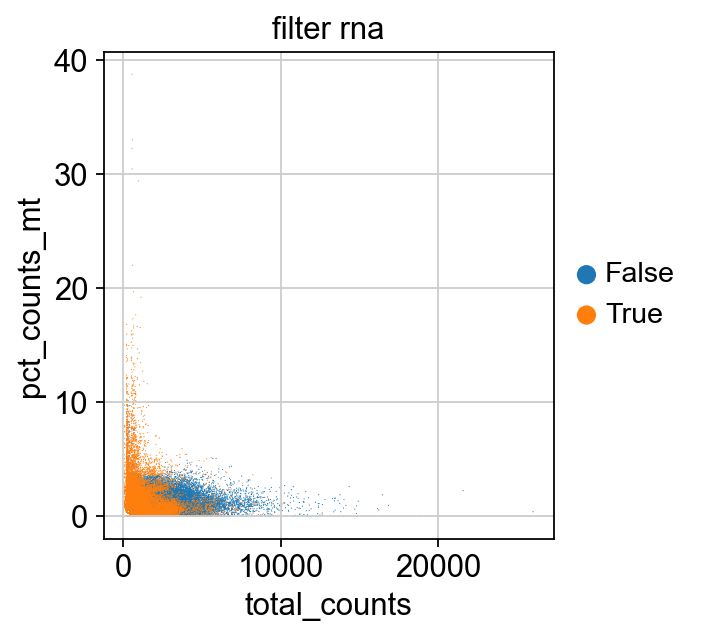

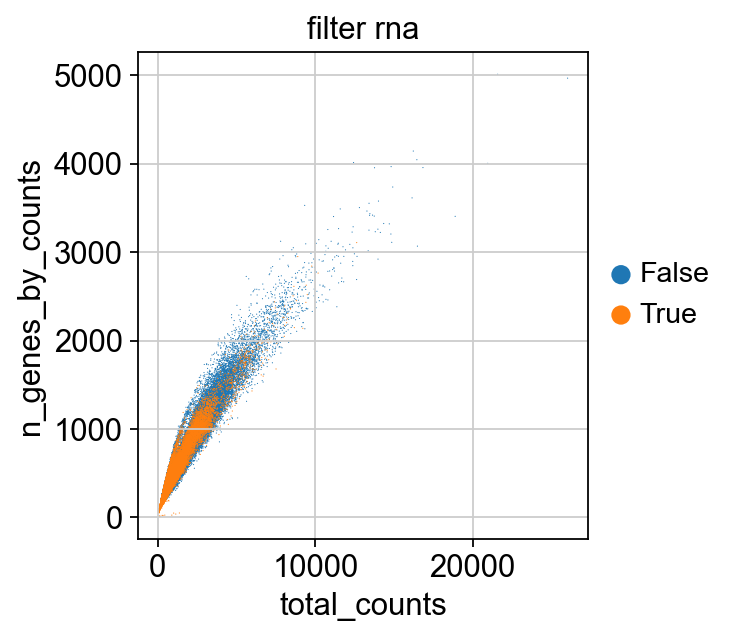

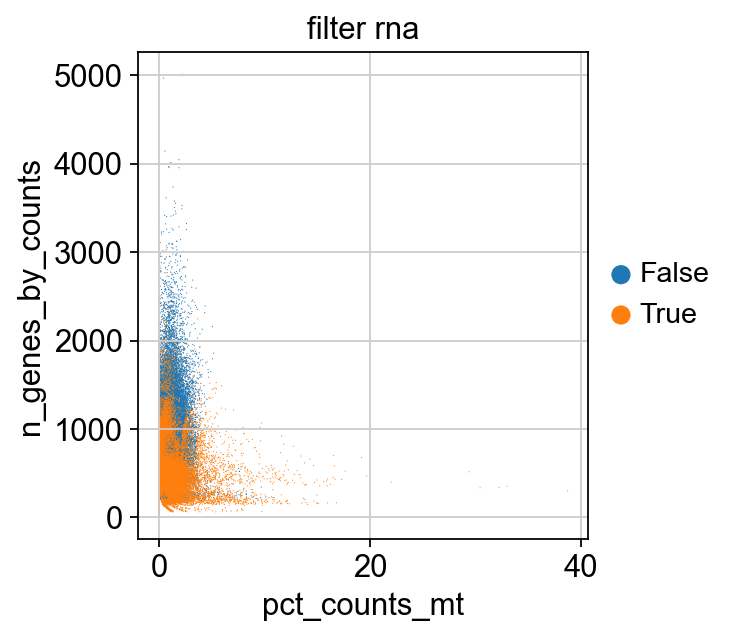

In [12]:
# Now let's visualise some QC metrics

sc.pl.scatter(adata, x = "total_counts", y= "pct_counts_mt", color= "filter_rna")
sc.pl.scatter(adata, x = "total_counts", y = "n_genes_by_counts", color = "filter_rna")
sc.pl.scatter(adata, x = "pct_counts_mt", y = "n_genes_by_counts", color = "filter_rna")

# n_genes_by_counts = number of genes with positive counts in a cell (similar to nFeature_RNA in seurat)
# total_counts = total number of counts for a cell, which is also known as library size (similar to nCount_RNA in seurat = nUMI)

In [13]:
###### Tabulate number of cells per sample... 

pd.crosstab(adata.obs["sample"], adata.obs["filter_rna"])

#cross tab: https://stackoverflow.com/questions/21247203/how-to-make-a-pandas-crosstab-with-percentages
# https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
# https://pbpython.com/pandas-crosstab.html


##############  
# Crappy samples:
# For CD4: P01 and V
# For CD8: L01 and V
# For DP: L01 and WY


filter_rna  False  True
sample                 
CD4_L01      9950  1437
CD4_P01      8115  3890
CD4_WY      11674   439
CD8_L01      1328  8136
CD8_P01      6659  2123
CD8_WY       9440  1923
DP_L01       1765  4900
DP_P01       5074  3353
DP_WY        1967  4611
V_CD4        3605  7970
V_CD8        6277  3513
V_DP         5710  2913

In [14]:
## Repeating this as a percentage
# You'll just have the function that does row/row.sum(), and you use apply with axis=1 to apply it by row.

pd.crosstab(adata.obs["sample"], adata.obs["filter_rna"]).apply(
    lambda row: row/row.sum() * 100, axis = 1 
)

filter_rna      False       True
sample                          
CD4_L01     87.380346  12.619654
CD4_P01     67.596835  32.403165
CD4_WY      96.375795   3.624205
CD8_L01     14.032122  85.967878
CD8_P01     75.825552  24.174448
CD8_WY      83.076652  16.923348
DP_L01      26.481620  73.518380
DP_P01      60.211226  39.788774
DP_WY       29.902706  70.097294
V_CD4       31.144708  68.855292
V_CD8       64.116445  35.883555
V_DP        66.218254  33.781746

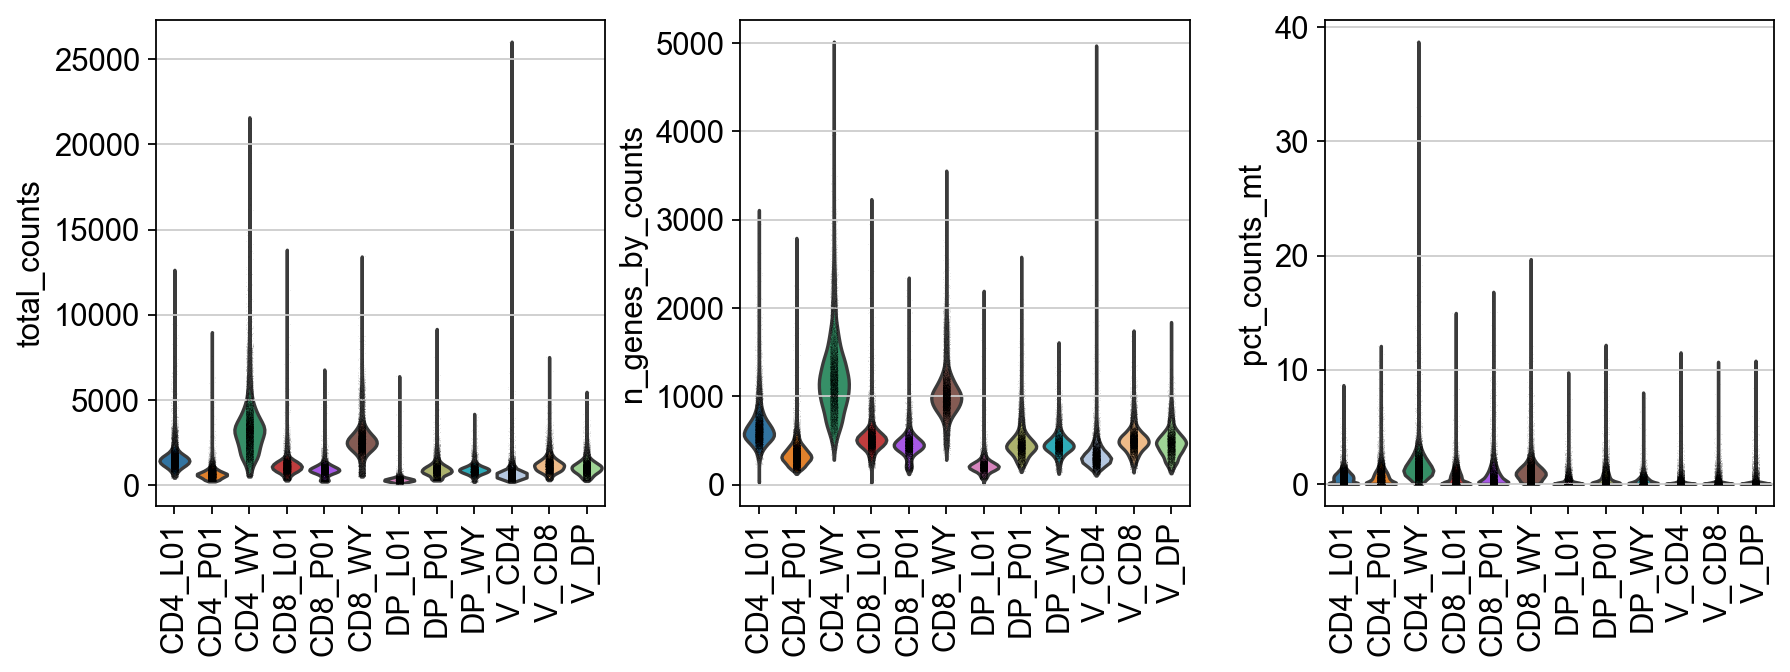

In [15]:
## Plotting violin plots for QC metrics too

sc.pl.violin(adata, ['total_counts', 'n_genes_by_counts', 'pct_counts_mt'], size = 0.1,
 groupby='sample', multi_panel = True, rotation = 90)

Continue processing with "good" cells only.. 

In [16]:
adata = adata[adata.obs["filter_rna"] == "False"].copy()

############## Things to ask Kelvin - why don't get mito cutoff to <5?


#### Redo QC plots with the "good" cells post-filtering

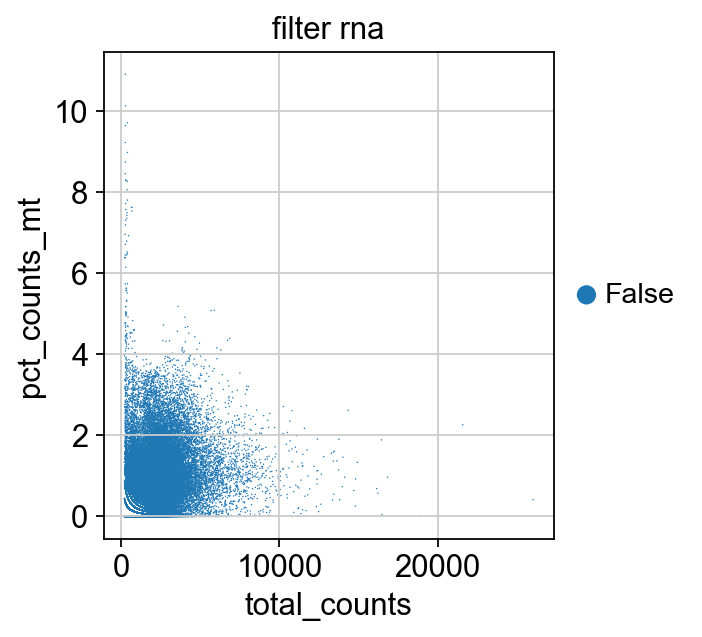

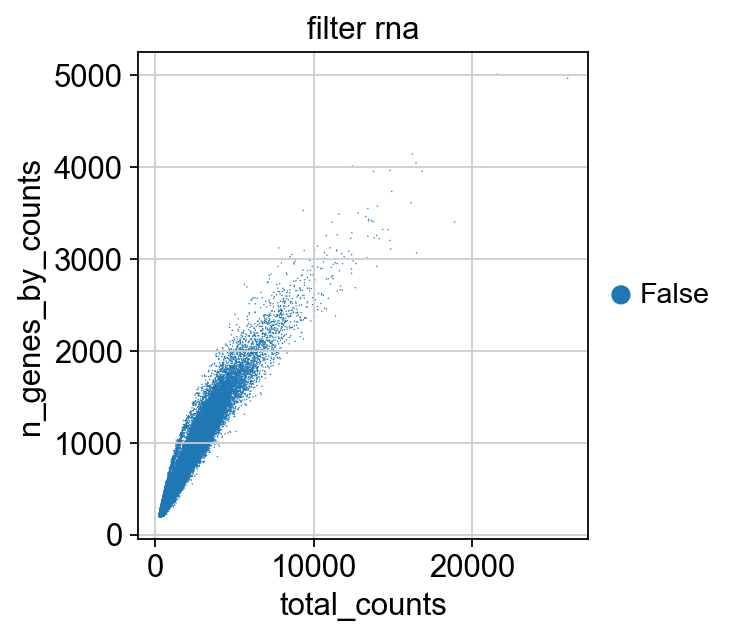

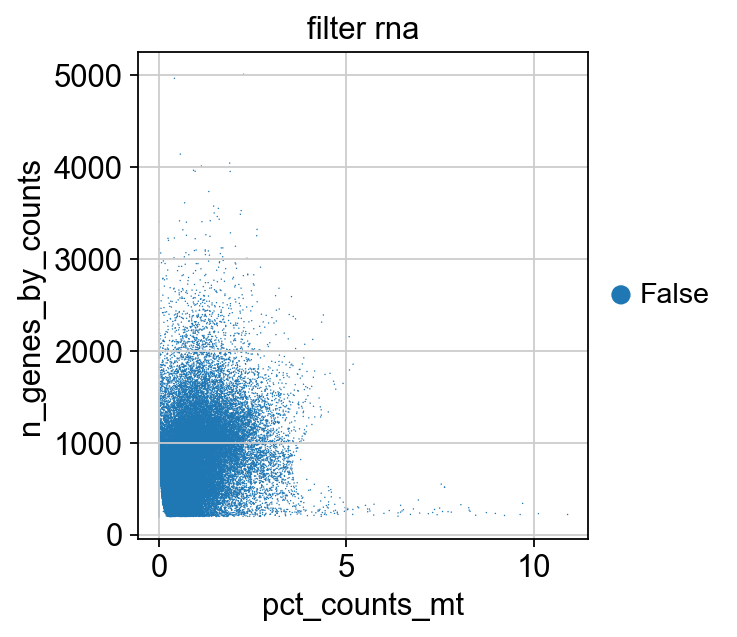

In [17]:
sc.pl.scatter(adata, x = "total_counts", y= "pct_counts_mt", color= "filter_rna")
sc.pl.scatter(adata, x = "total_counts", y = "n_genes_by_counts", color = "filter_rna")
sc.pl.scatter(adata, x = "pct_counts_mt", y = "n_genes_by_counts", color = "filter_rna")

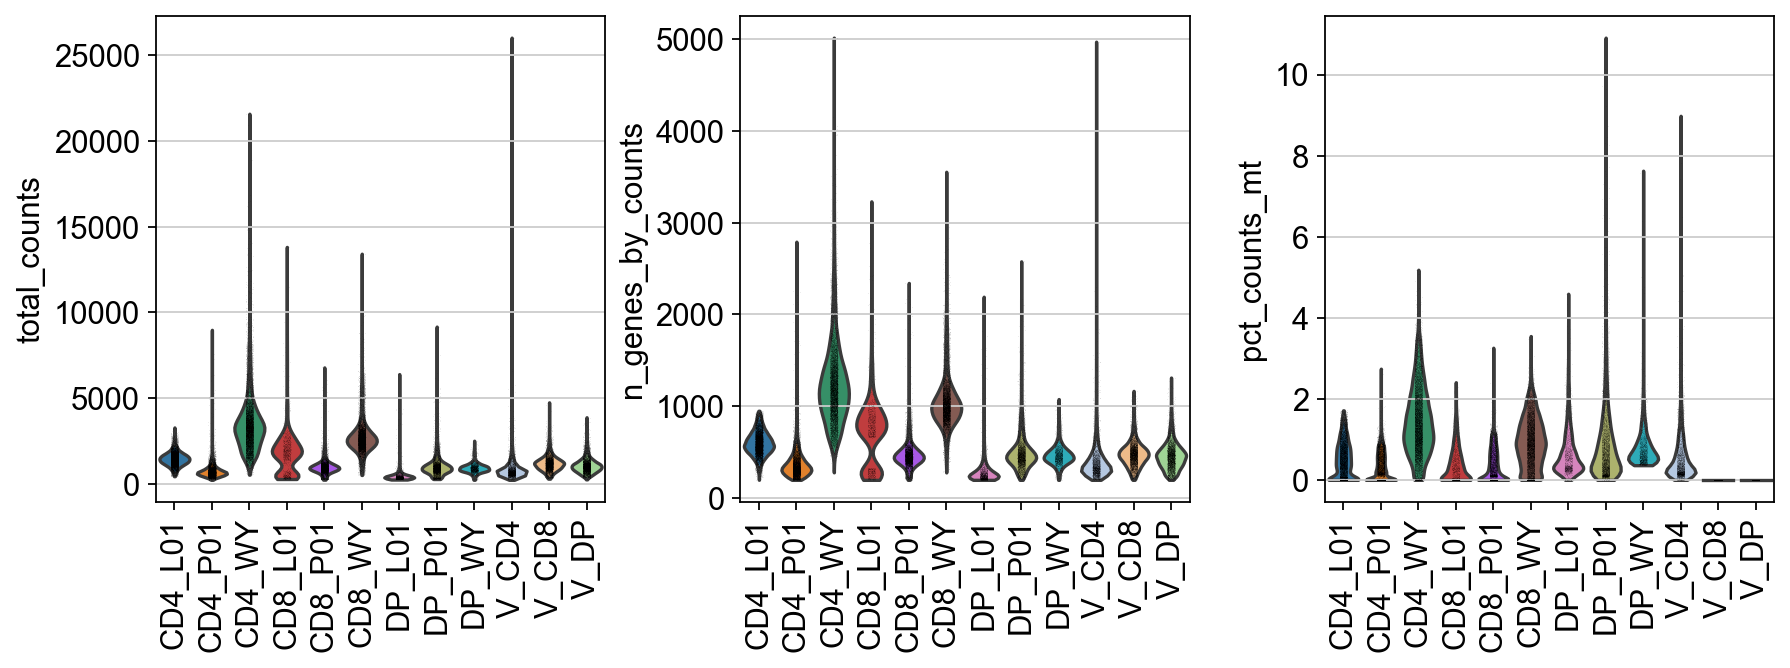

In [18]:
# also via violin plot

sc.pl.violin(adata, ['total_counts', 'n_genes_by_counts', 'pct_counts_mt'], size = 0.1,
 groupby='sample', multi_panel = True, rotation = 90)

In [19]:
# maybe just do cutoff and see what happens... 

bdata = adata
bdata

AnnData object with n_obs × n_vars = 71564 × 36601
    obs: 'sample', 'sort_type', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'batch'
    uns: 'filter_rna_colors', 'sample_colors'
    layers: 'count'

In [20]:
bdata = bdata[bdata.obs.pct_counts_mt <5, :]
bdata #71511

# I also want to filter out cells with low gene expression.. 
bdata = bdata[bdata.obs.n_genes_by_counts > 200, :]
bdata #71460

View of AnnData object with n_obs × n_vars = 71460 × 36601
    obs: 'sample', 'sort_type', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'batch'
    uns: 'filter_rna_colors', 'sample_colors'
    layers: 'count'

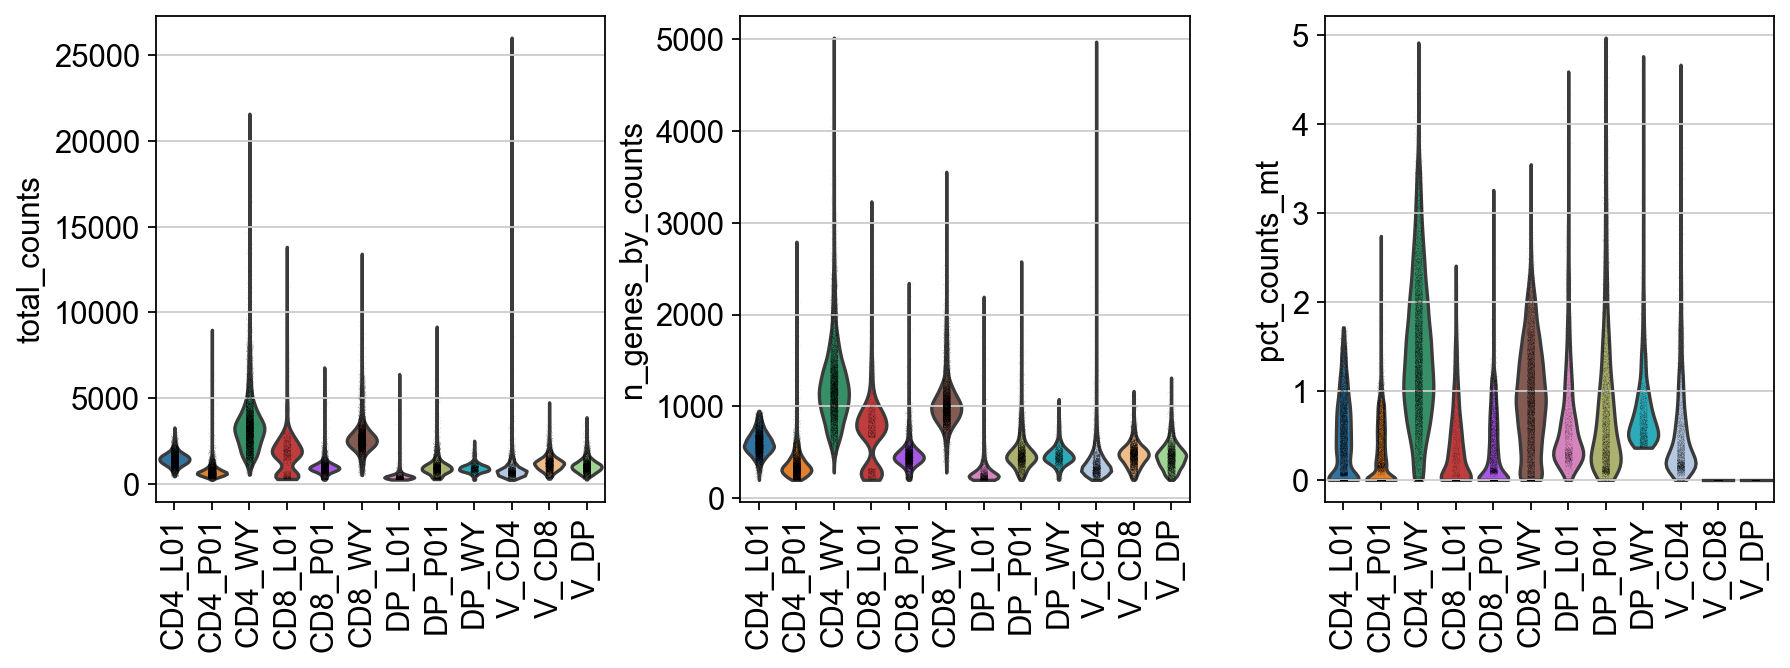

In [21]:
# also violin plot

sc.pl.violin(bdata, ['total_counts', 'n_genes_by_counts', 'pct_counts_mt'], size = 0.1,
 groupby='sample', multi_panel = True, rotation = 90)

 # didn't change too much - so ignore.. 

In [22]:
########### Anyway let's go back to the original data... adata

# remove uninformative genes for now - this filters out genes that are not expressed in least 3 cells.

sc.pp.filter_genes(adata, min_cells=3)
adata    # 71561 cells, 21591 genes


AnnData object with n_obs × n_vars = 71564 × 21591
    obs: 'sample', 'sort_type', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'batch'
    var: 'n_cells'
    uns: 'filter_rna_colors', 'sample_colors'
    layers: 'count'

## Normalisation

In [23]:
# Total-count normalize (library-size correct) the data matrix 𝐗 to 10,000 reads per cell, so that counts become comparable among cells.
sc.pp.normalize_total(adata, target_sum=1e4)

# Logarithmize the data:
sc.pp.log1p(adata)


In [24]:
adata

AnnData object with n_obs × n_vars = 71564 × 21591
    obs: 'sample', 'sort_type', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'batch'
    var: 'n_cells'
    uns: 'filter_rna_colors', 'sample_colors', 'log1p'
    layers: 'count'

In [25]:
adata.uns['log1p']
# output: {'base': None}

{'base': None}

# 2. Highly variable Genes

## Identify and inspect highly-variable genes

In [26]:
# (Expects logarithimised data)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata

AnnData object with n_obs × n_vars = 71564 × 21591
    obs: 'sample', 'sort_type', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'batch'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'filter_rna_colors', 'sample_colors', 'log1p', 'hvg'
    layers: 'count'

In [27]:
# to see genes
adata.var   #there is now a hvg column

n_cells  highly_variable     means  dispersions  dispersions_norm
AL627309.1       28            False  0.002955     2.668805          1.095161
AL627309.5       14            False  0.001691     2.715631          1.237420
LINC01409      1119            False  0.107368     2.426608          0.359353
FAM87B            9            False  0.001084     2.303611         -0.014320
LINC01128      1500            False  0.119151     2.242956         -0.198594
...             ...              ...       ...          ...               ...
AL354822.1       84            False  0.008451     2.423547          0.350051
AL592183.1      738             True  0.073456     2.578236          0.820007
AC240274.1      124            False  0.011603     2.549724          0.733385
AC004556.3      782            False  0.060707     2.211048         -0.295533
AC007325.4       26            False  0.003908     3.253029          2.870066

[21591 rows x 5 columns]

In [28]:
adata.uns['log1p']

{'base': None}

In [29]:
### to get structure of dataframe
adata.var.info()
adata.obs.info()

### to get the number of HV genes... because the column "highly_variable" is a boolean vector - ie it gives True (1) or False (0), you can use sum function to know... 
print(adata.var.highly_variable.sum())    #2373 HVG genes..

<class 'pandas.core.frame.DataFrame'>
Index: 21591 entries, AL627309.1 to AC007325.4
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   n_cells           21591 non-null  int64  
 1   highly_variable   21591 non-null  bool   
 2   means             21591 non-null  float64
 3   dispersions       21591 non-null  float64
 4   dispersions_norm  21591 non-null  float32
dtypes: bool(1), float32(1), float64(2), int64(1)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 71564 entries, CD4_L01_AAACCTGAGAGCTATA-1 to V_DP_TTTGTCATCTTGTTTG-1
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   sample                       71564 non-null  category
 1   sort_type                    71564 non-null  category
 2   donor                        71564 non-null  category
 3   n_genes_by_counts            71564 

#### Plot out the number of highly variable genes

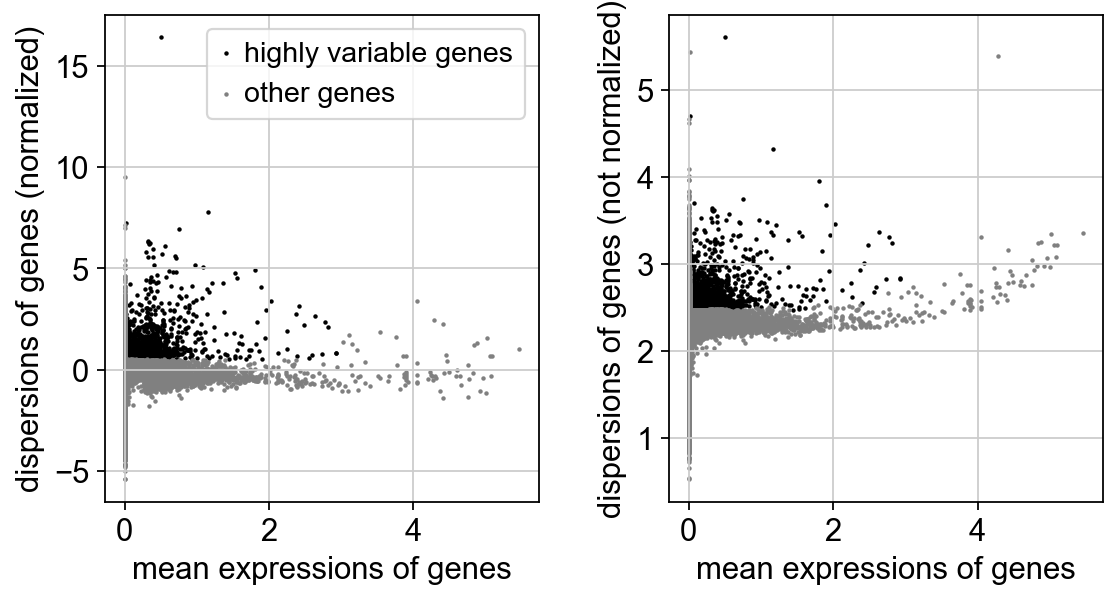

In [30]:
sc.pl.highly_variable_genes(adata)

#### To inspect HV genes... first, create a dataframe containing the info. 

In [31]:
hvg = pd.DataFrame(adata.var.highly_variable)
hvg

highly_variable
AL627309.1            False
AL627309.5            False
LINC01409             False
FAM87B                False
LINC01128             False
...                     ...
AL354822.1            False
AL592183.1             True
AC240274.1            False
AC004556.3            False
AC007325.4            False

[21591 rows x 1 columns]

In [32]:
# to know the str
pd.DataFrame.info(hvg)

<class 'pandas.core.frame.DataFrame'>
Index: 21591 entries, AL627309.1 to AC007325.4
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   highly_variable  21591 non-null  bool 
dtypes: bool(1)
memory usage: 705.8+ KB


#### Add col name 'HV_status' and print hvg

In [33]:
hvg.columns = ['HV_status']
print(hvg)

            HV_status
AL627309.1      False
AL627309.5      False
LINC01409       False
FAM87B          False
LINC01128       False
...               ...
AL354822.1      False
AL592183.1       True
AC240274.1      False
AC004556.3      False
AC007325.4      False

[21591 rows x 1 columns]


#### Get only the True ones.. 

In [34]:
hvg_T = hvg.loc[hvg['HV_status'] == True]
hvg_T[:50]

HV_status
FAM41C           True
TNFRSF4          True
SCNN1D           True
ACAP3            True
MMP23B           True
SLC35E2A         True
DNAJC11          True
RERE             True
RERE-AS1         True
SPSB1            True
PIK3CD           True
AL357140.2       True
UBE4B            True
KIF1B            True
PEX14            True
VPS13D           True
PRDM2            True
FBXO42           True
EIF4G3           True
NIPAL3           True
AL050344.1       True
SH3BGRL3         True
ZNF683           True
EYA3             True
EPB41            True
FAM167B          True
FAM229A          True
S100PBP          True
ZMYM4            True
KIAA0319L        True
AGO4             True
AGO3             True
SNIP1            True
MACF1            True
RLF              True
AL603839.3       True
SCMH1            True
HIVEP3           True
FOXJ3            True
CCDC30           True
ST3GAL3          True
PTCH2            True
ZSWIM5           True
TESK2            True
MAST2            True
FAF1             True
EPS15            True
ZFYVE9           True
TUT4             True
DAB1             True

In [35]:
########### see all the variables here..   ##############
%who_ls

['Path',
 'adata',
 'adatas',
 'bdata',
 'ddl',
 'hvg',
 'hvg_T',
 'os',
 'out_path',
 'pd',
 'sample',
 'samples',
 'sc',
 'tools',
 'tqdm']

## Removing VDJ genes from HVG genes manually

### So how does T-cell receptor (TCR) differ from B-cell receptor (TCR)?
TCR has a single pair of alpha and beta chains while BCR contains two pairs of light and heavy chains.

In the examples below, TCR can be expressed as TR while BCR can be expressed as IG.

### The code below is for BCR data.

In [36]:
#### Because this is 10x 5' data - there is a lot of VDJ genes that are picked up (in abundance), and because they do look different from each donor, it can be mis-computed as HVG - REMOVE THEM.

import re

for i in adata.var.index:
    if re.search("^IG[HKL][VDJC]", i):
        adata.var.at[i, "highly_variable"] = False



#### It uses the re module, which stands for regular expressions, to search for specific patterns in the index values.
#Let's break down the code step by step:

# for i in adata.var.index:: This initiates a loop that iterates over each value (i) in the index of the adata.var object.

# if re.search("^TR[AB][VDJ]|^IG[HKL][VDJC]", i):: This line uses regular expressions to check if the current index value (i) matches a specific pattern. The regular expression pattern is as follows:

# ^: Asserts the position at the start of the string.
# TR: Matches the characters "TR" literally.
# [AB]: Matches either "A" or "B".
# [VDJ]: Matches either "V", "D", or "J".
# |: Acts as an OR operator in regular expressions.
# ^IG: Matches the characters "IG" literally.
# [HKL]: Matches either "H", "K", or "L".
# [VDJC]: Matches either "V", "D", "J", or "C".
# The regular expression is looking for index values that either start with "TR", followed by "A" or "B", and then one of "V", "D", or "J", OR index values that start with "IG", followed by "H", "K", or "L", and then one of "V", "D", "J", or "C".

# adata.var.at[i, "highly_variable"] = False: If the regular expression matches the current index value (i), it sets the corresponding value of "highly_variable" in the adata.var object to False.

# In summary, this modified code is looping through the index values of the adata.var object and using a regular expression to identify specific patterns in the index values that match either the TRABVDJ or the IGHKVDJC pattern. If a match is found, it sets the corresponding "highly_variable" value to False. This code could be used to mark certain entries in the adata.var object as not highly variable based on the new regular expression pattern. Just like before, it's important to ensure that you understand the data and the intention behind the code before executing it, as regular expressions can be tricky and their behavior can be sensitive to small changes in the pattern.

#The purpose of this code seems to be to mark certain entries in the adata.var object as "not highly_variable" based on the matching pattern defined in the regular expression.

### Now, repeat the code but only do it from the TCR dataset

In [37]:
import re

for i in adata.var.index:
    if re.search("^TR[AB][VDJ]", i):
        adata.var.at[i, "highly_variable"] = False

### The code below is for BOTH TCR and BCR data.

In [38]:
import re

for i in adata.var.index:
    if re.search("^TR[AB][VDJ]|^IG[HKL][VDJC]", i):
        adata.var.at[i, "highly_variable"] = False


### Let's re-inspect the highly-variable gene list

In [39]:
hvg = pd.DataFrame(adata.var.highly_variable)
hvg_T = hvg.loc[hvg['highly_variable'] == True]
hvg_T #2285 genes...


highly_variable
FAM41C                 True
TNFRSF4                True
SCNN1D                 True
ACAP3                  True
MMP23B                 True
...                     ...
MT-ND4L                True
MT-ND4                 True
MT-CYB                 True
MAFIP                  True
AL592183.1             True

[2285 rows x 1 columns]

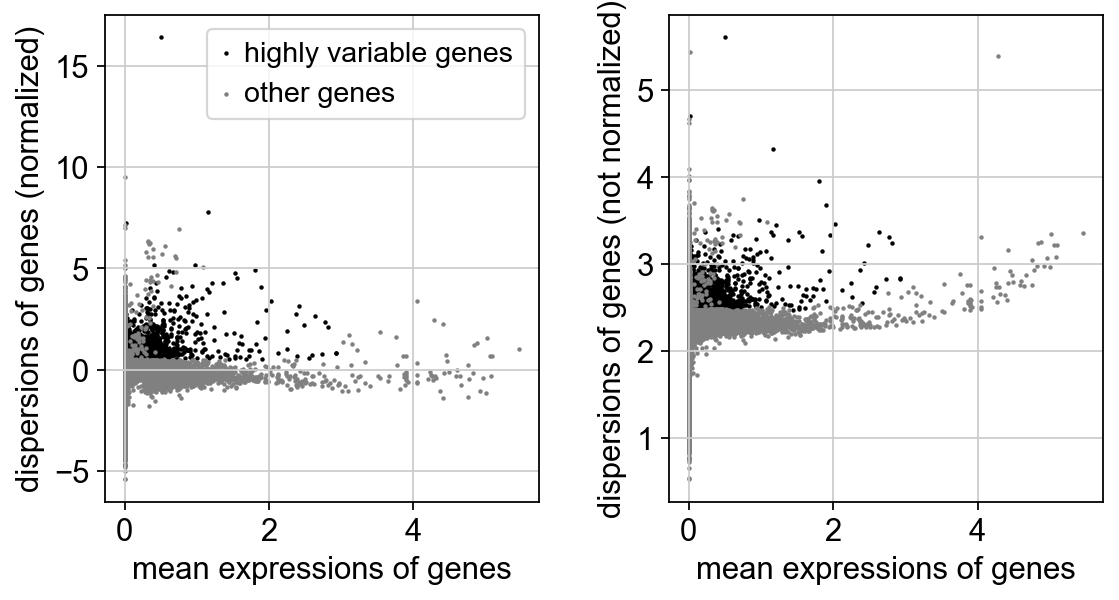

In [40]:
sc.pl.highly_variable_genes(adata)

### Explain what adata.raw, adata.layers and adata.X mean; + include examples after 40 using numpy - normal vs log-transformed

### What is the difference between adata.raw, adata.X, and adata.raw.X?


adata.raw = Setting the .raw attribute of the AnnData object to the normalized and logarithmized raw gene expression for later use in differential testing and visualizations of gene expression. This simply freezes the state of the AnnData object.

The raw attribute is initialized with the current content of an object by setting:

In [41]:
adata.raw = adata

You can get back an AnnData of the object in .raw by calling .raw.to_adata().

In [42]:
adata.raw = adata.raw.to_adata()

adata.X represents the data matrix of n_obs × n_var and so is referencing an explicit layer of .X

But in our case we will need the .raw attribute to run the next line

In [43]:
adata.uns['log1p']
# {'base': None}

{'base': None}

### What does the different data files mean?

The different data files: 

1. raw data before ANY filtering
"raw_adata_v2.h5ad"

2. processed data after filtering and HV gene calculation
"adata_processed_v2.h5ad"

3. processed data after filtering, HV gene calculation and BBKNN batch correction
"adata_processed_bbknn_v2.h5ad"

--- You will see object 3. in section 4

4. After everything, we added TCR to get ready for Dandelion
"adata_processed_v2_tcr.h5ad"

--- You will see object 4. in section X

# 3. Perform Dimensionality Reduction

## 3a. PCA

In [44]:
# Actually do the filtering for PCA
adata = adata[:,adata.var.highly_variable].copy()        # all rows/indexes : columns only selecting for those within high_variable, and then making a copy of itself 
adata

AnnData object with n_obs × n_vars = 71564 × 2285
    obs: 'sample', 'sort_type', 'donor', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'scrublet_score', 'n_genes', 'gmm_pct_count_clusters_keep', 'is_doublet', 'filter_rna', 'batch'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'filter_rna_colors', 'sample_colors', 'log1p', 'hvg'
    layers: 'count'

#### Regress out effects of "total_counts" per cell and percentage of mt genes expressed ("pct_counts_mt").

In [45]:
 sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])

#### Scale each gene to unit variance. Clip values exceeding std of 10. 

In [46]:
sc.pp.scale(adata, max_value = 10)

### Why do we need to scale the data?

In [47]:
## get PCA
sc.tl.pca(adata, svd_solver="arpack")

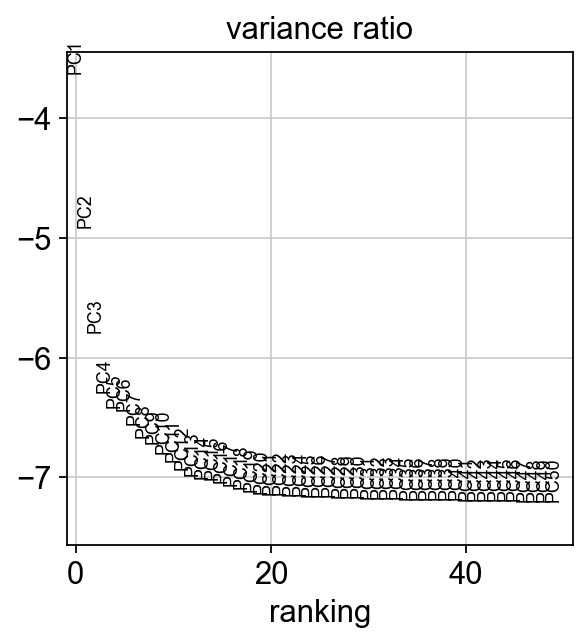

In [48]:
# get elbow plot to see variance contribution by each pc
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)

In [49]:
## Computing neighbourhood graph - here UMAP
sc.pp.neighbors(adata, n_neighbors = 10, n_pcs=40)

## n_neighbor: The size of local neighborhood (in terms of number of neighboring data
#points) used for manifold approximation. Larger values result in more
#global views of the manifold, while smaller values result in more local
#data being preserved. In general values should be in the range 2 to 100.
#If `knn` is `True`, number of nearest neighbors to be searched. If `knn`
#is `False`, a Gaussian kernel width is set to the distance of the
#`n_neighbors` neighbor.

## 3b. UMAP Visualisation

Embedding the neighbourhood graph using UMAP

In [50]:
sc.tl.umap(adata, min_dist=0.3) # 0.3 is personal preference

#### Visualise UMAP:

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


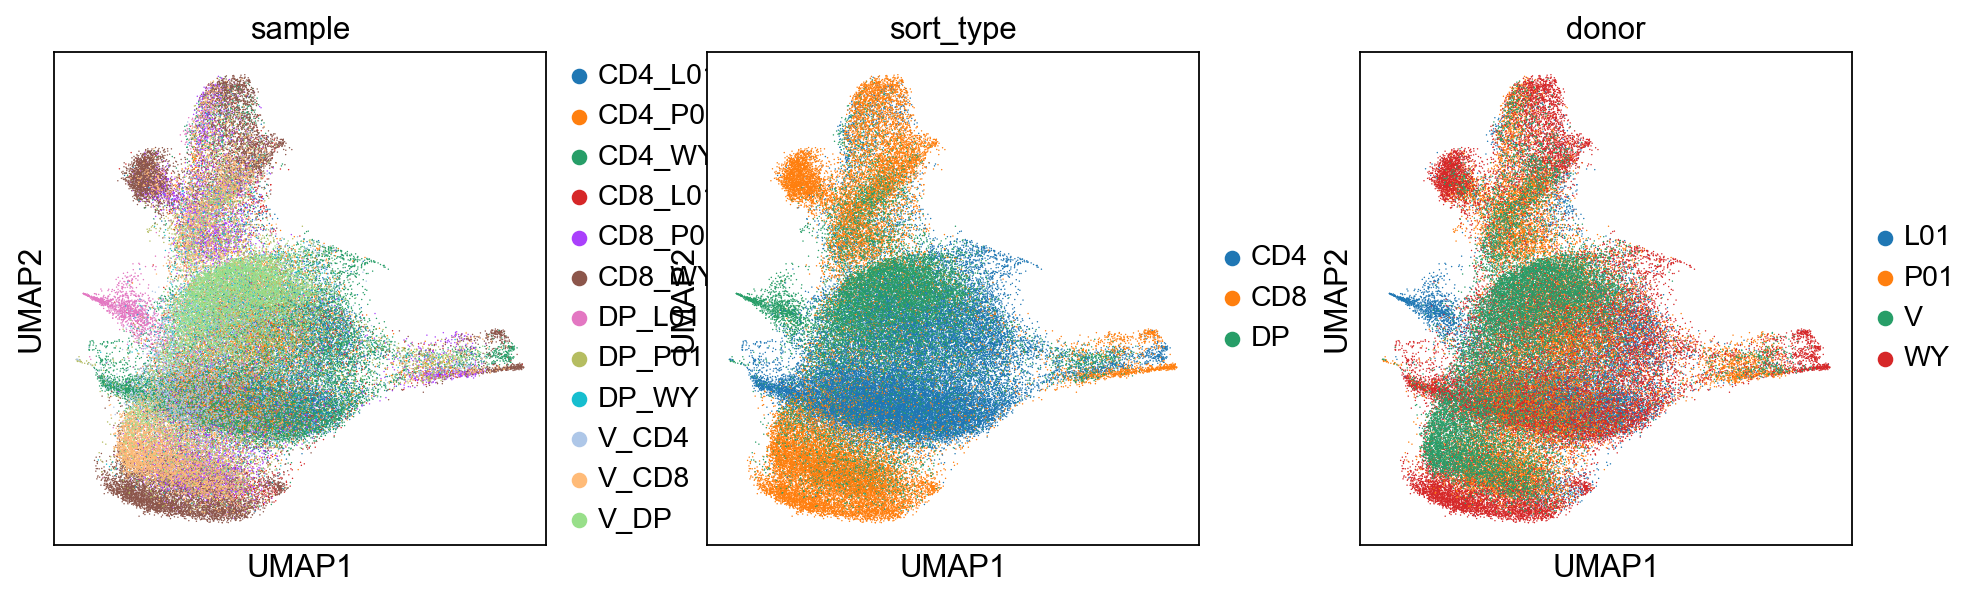

In [51]:
sc.pl.umap(
    adata,
    color=[
        "sample",
        "sort_type",
        "donor",
    ],
)

In [52]:
#### plotting multiple small umaps of the same parameter, similar to faceting/split.by

## https://github.com/scverse/scanpy/issues/955
def cluster_small_multiples(adata, clust_key, size=30, frameon=False, legend_loc=None, **kwargs):
    tmp = adata.copy()

    for i,clust in enumerate(adata.obs[clust_key].cat.categories):
        tmp.obs[clust] = adata.obs[clust_key].isin([clust]).astype('category')
        tmp.uns[clust+'_colors'] = ['#d3d3d3', adata.uns[clust_key+'_colors'][i]]

    sc.pl.umap(tmp, groups=tmp.obs[clust].cat.categories[1:].values, color=adata.obs[clust_key].cat.categories.tolist(), size=size, frameon=frameon, legend_loc=legend_loc, **kwargs)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


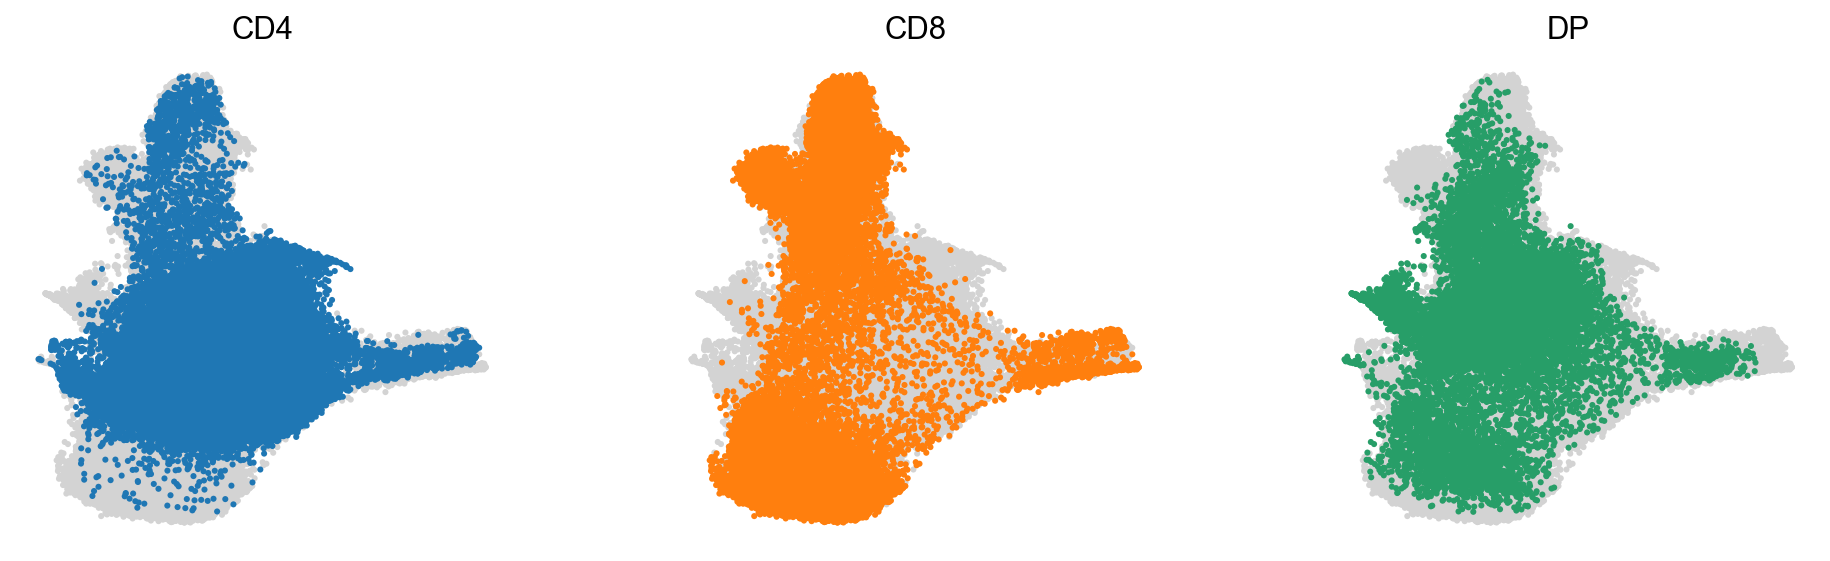

In [53]:
cluster_small_multiples(adata, 'sort_type')

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


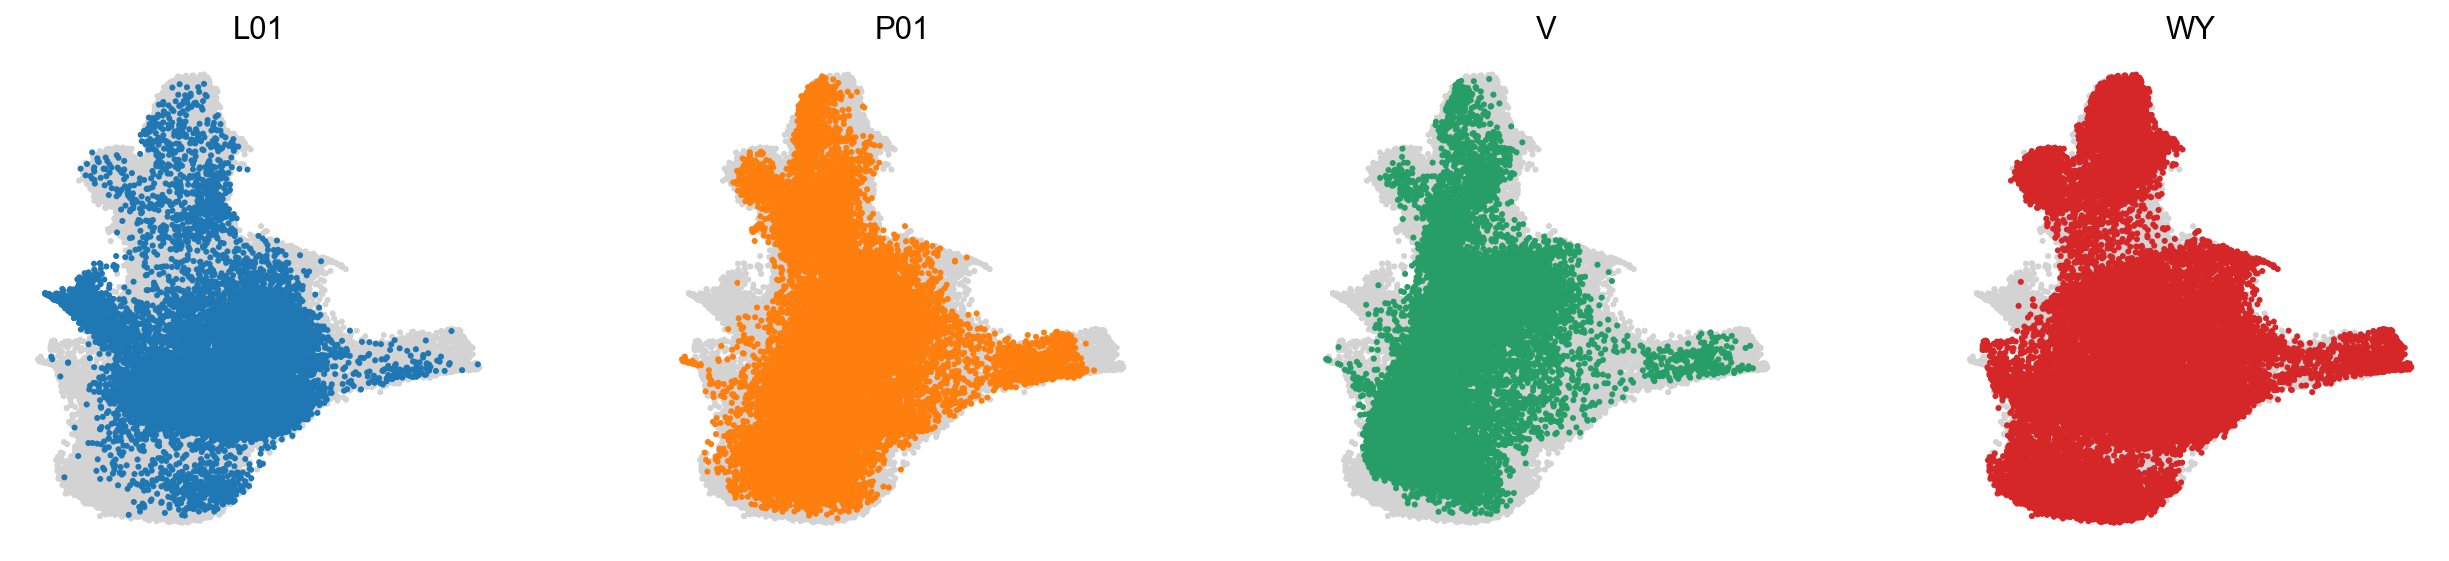

In [54]:
cluster_small_multiples(adata, 'donor')  
# not too much donor biasness.. 

Next, I want to visualise key lineage genes on the UMAP that is subset by their sort_type.

#### Can I do a quick QC: subset data by sort type, and plot the relevant marker genes on them? 

We can create an object by sorting for CD4 and then check the table of variables:

In [55]:
adata.obs.info()
adata_CD4 = adata[adata.obs['sort_type'] == "CD4"]
adata_CD4.obs

<class 'pandas.core.frame.DataFrame'>
Index: 71564 entries, CD4_L01_AAACCTGAGAGCTATA-1 to V_DP_TTTGTCATCTTGTTTG-1
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   sample                       71564 non-null  category
 1   sort_type                    71564 non-null  category
 2   donor                        71564 non-null  category
 3   n_genes_by_counts            71564 non-null  int32   
 4   total_counts                 71564 non-null  float32 
 5   total_counts_mt              71564 non-null  float32 
 6   pct_counts_mt                71564 non-null  float32 
 7   scrublet_score               71564 non-null  float64 
 8   n_genes                      71564 non-null  int64   
 9   gmm_pct_count_clusters_keep  71564 non-null  bool    
 10  is_doublet                   71564 non-null  category
 11  filter_rna                   71564 non-null  category
 12  batch                 

sample sort_type donor  n_genes_by_counts   
CD4_L01_AAACCTGAGAGCTATA-1  CD4_L01       CD4   L01                722  \
CD4_L01_AAACCTGAGGAGCGAG-1  CD4_L01       CD4   L01                562   
CD4_L01_AAACCTGAGGCAGTCA-1  CD4_L01       CD4   L01                507   
CD4_L01_AAACCTGAGTCAAGCG-1  CD4_L01       CD4   L01                602   
CD4_L01_AAACCTGAGTCCTCCT-1  CD4_L01       CD4   L01                433   
...                             ...       ...   ...                ...   
V_CD4_TTTGTCACATTACGAC-1      V_CD4       CD4     V                387   
V_CD4_TTTGTCAGTACTTGAC-1      V_CD4       CD4     V                252   
V_CD4_TTTGTCATCCGCAGTG-1      V_CD4       CD4     V                294   
V_CD4_TTTGTCATCTCACATT-1      V_CD4       CD4     V                774   
V_CD4_TTTGTCATCTGTTGAG-1      V_CD4       CD4     V                281   

                            total_counts  total_counts_mt  pct_counts_mt   
CD4_L01_AAACCTGAGAGCTATA-1        1726.0             14.0       0.811124  \
CD4_L01_AAACCTGAGGAGCGAG-1        1443.0             15.0       1.039501   
CD4_L01_AAACCTGAGGCAGTCA-1        1141.0              4.0       0.350570   
CD4_L01_AAACCTGAGTCAAGCG-1        1410.0             16.0       1.134752   
CD4_L01_AAACCTGAGTCCTCCT-1        1064.0              7.0       0.657895   
...                                  ...              ...            ...   
V_CD4_TTTGTCACATTACGAC-1           755.0              3.0       0.397351   
V_CD4_TTTGTCAGTACTTGAC-1           516.0              2.0       0.387597   
V_CD4_TTTGTCATCCGCAGTG-1           513.0              3.0       0.584795   
V_CD4_TTTGTCATCTCACATT-1          1589.0              5.0       0.314663   
V_CD4_TTTGTCATCTGTTGAG-1           491.0              4.0       0.814664   

                            scrublet_score  n_genes   
CD4_L01_AAACCTGAGAGCTATA-1        0.456193      722  \
CD4_L01_AAACCTGAGGAGCGAG-1        0.156962      562   
CD4_L01_AAACCTGAGGCAGTCA-1        0.216129      507   
CD4_L01_AAACCTGAGTCAAGCG-1        0.408219      602   
CD4_L01_AAACCTGAGTCCTCCT-1        0.188953      433   
...                                    ...      ...   
V_CD4_TTTGTCACATTACGAC-1          0.164948      387   
V_CD4_TTTGTCAGTACTTGAC-1          0.138952      252   
V_CD4_TTTGTCATCCGCAGTG-1          0.235993      294   
V_CD4_TTTGTCATCTCACATT-1          0.339450      774   
V_CD4_TTTGTCATCTGTTGAG-1          0.160151      281   

                            gmm_pct_count_clusters_keep is_doublet filter_rna   
CD4_L01_AAACCTGAGAGCTATA-1                         True      False      False  \
CD4_L01_AAACCTGAGGAGCGAG-1                         True      False      False   
CD4_L01_AAACCTGAGGCAGTCA-1                         True      False      False   
CD4_L01_AAACCTGAGTCAAGCG-1                         True      False      False   
CD4_L01_AAACCTGAGTCCTCCT-1                         True      False      False   
...                                                 ...        ...        ...   
V_CD4_TTTGTCACATTACGAC-1                           True      False      False   
V_CD4_TTTGTCAGTACTTGAC-1                           True      False      False   
V_CD4_TTTGTCATCCGCAGTG-1                           True      False      False   
V_CD4_TTTGTCATCTCACATT-1                           True      False      False   
V_CD4_TTTGTCATCTGTTGAG-1                           True      False      False   

                           batch  
CD4_L01_AAACCTGAGAGCTATA-1     0  
CD4_L01_AAACCTGAGGAGCGAG-1     0  
CD4_L01_AAACCTGAGGCAGTCA-1     0  
CD4_L01_AAACCTGAGTCAAGCG-1     0  
CD4_L01_AAACCTGAGTCCTCCT-1     0  
...                          ...  
V_CD4_TTTGTCACATTACGAC-1       9  
V_CD4_TTTGTCAGTACTTGAC-1       9  
V_CD4_TTTGTCATCCGCAGTG-1       9  
V_CD4_TTTGTCATCTCACATT-1       9  
V_CD4_TTTGTCATCTGTTGAG-1       9  

[33344 rows x 13 columns]

## What are relevant genes for CD4 and CD8? 

### Plot CD8 on adata_CD4
Check what CD8 gene is annotated as...

How would you colour the plot by?

(Instruction to host: Remove everything after colour =...)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


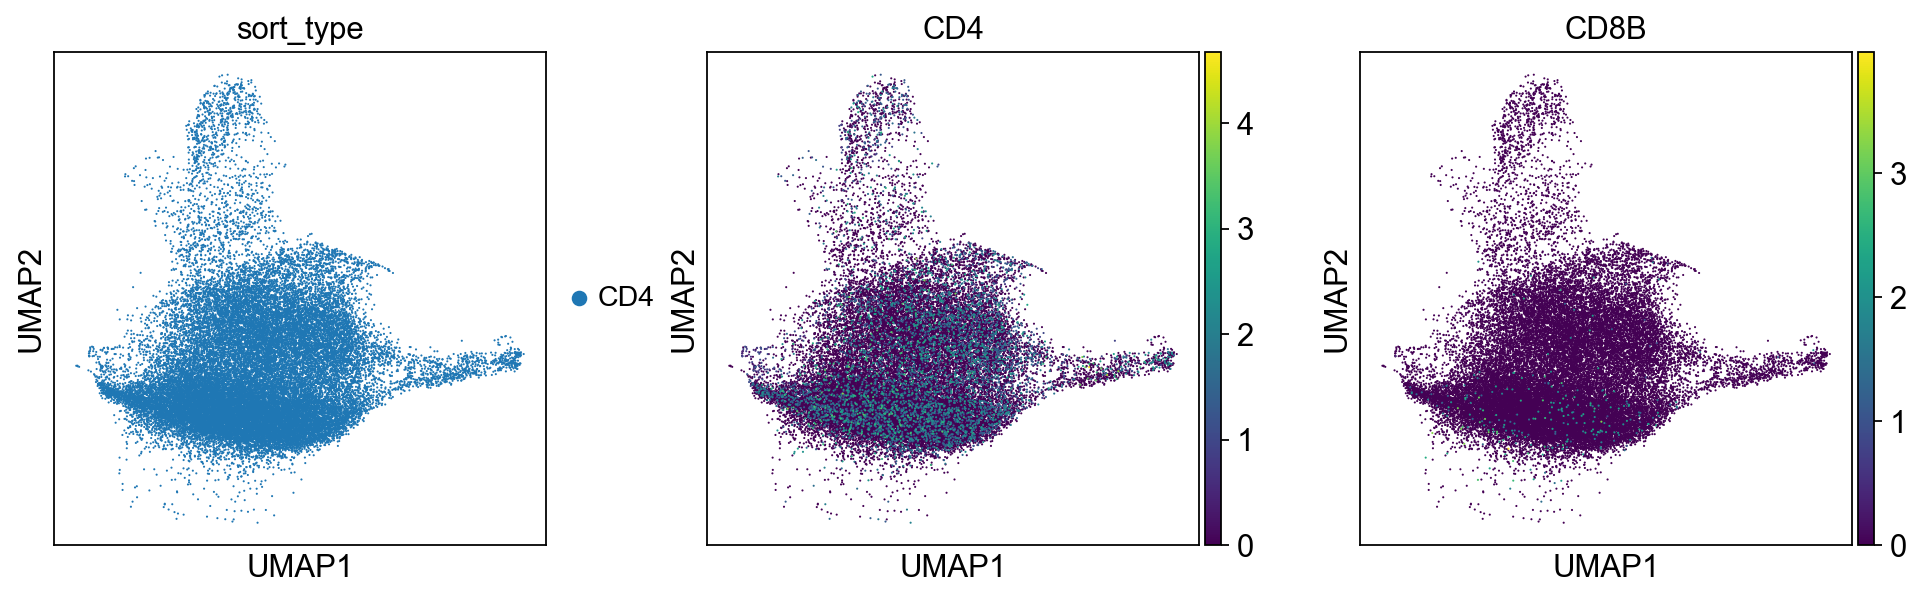

In [56]:
sc.pl.umap(adata_CD4, color = ["sort_type", "CD4", "CD8B"], ncols = 3)

### How would you sort for CD8?
#### Create an object for CD8 sorted cells and plot it as a UMAP


/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


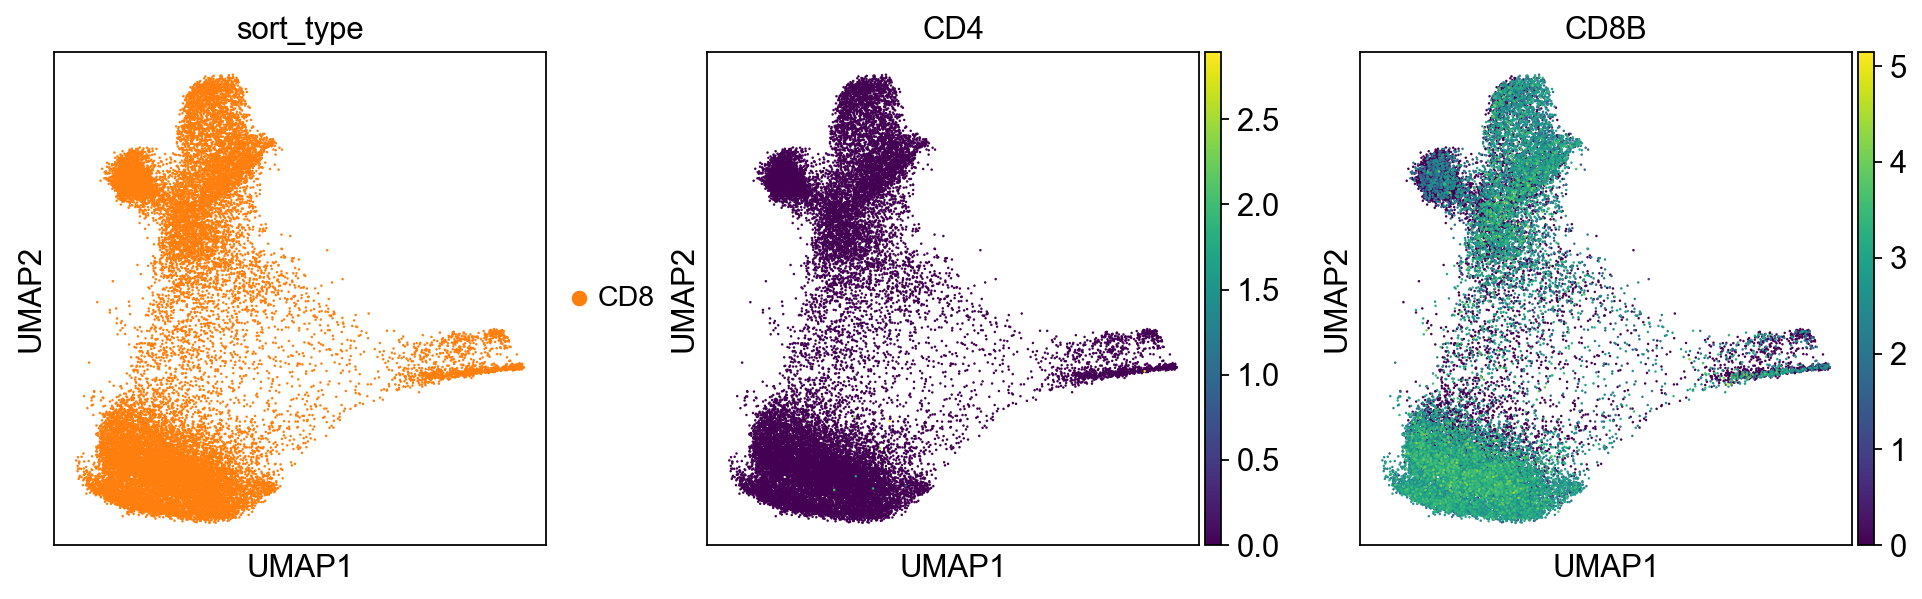

In [57]:
adata_CD8 = adata[adata.obs['sort_type'] == "CD8"]
adata_CD8.obs
sc.pl.umap(adata_CD8, color = ["sort_type", "CD4", "CD8B"], ncols = 3)

### Repeat for DP sort.. 

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


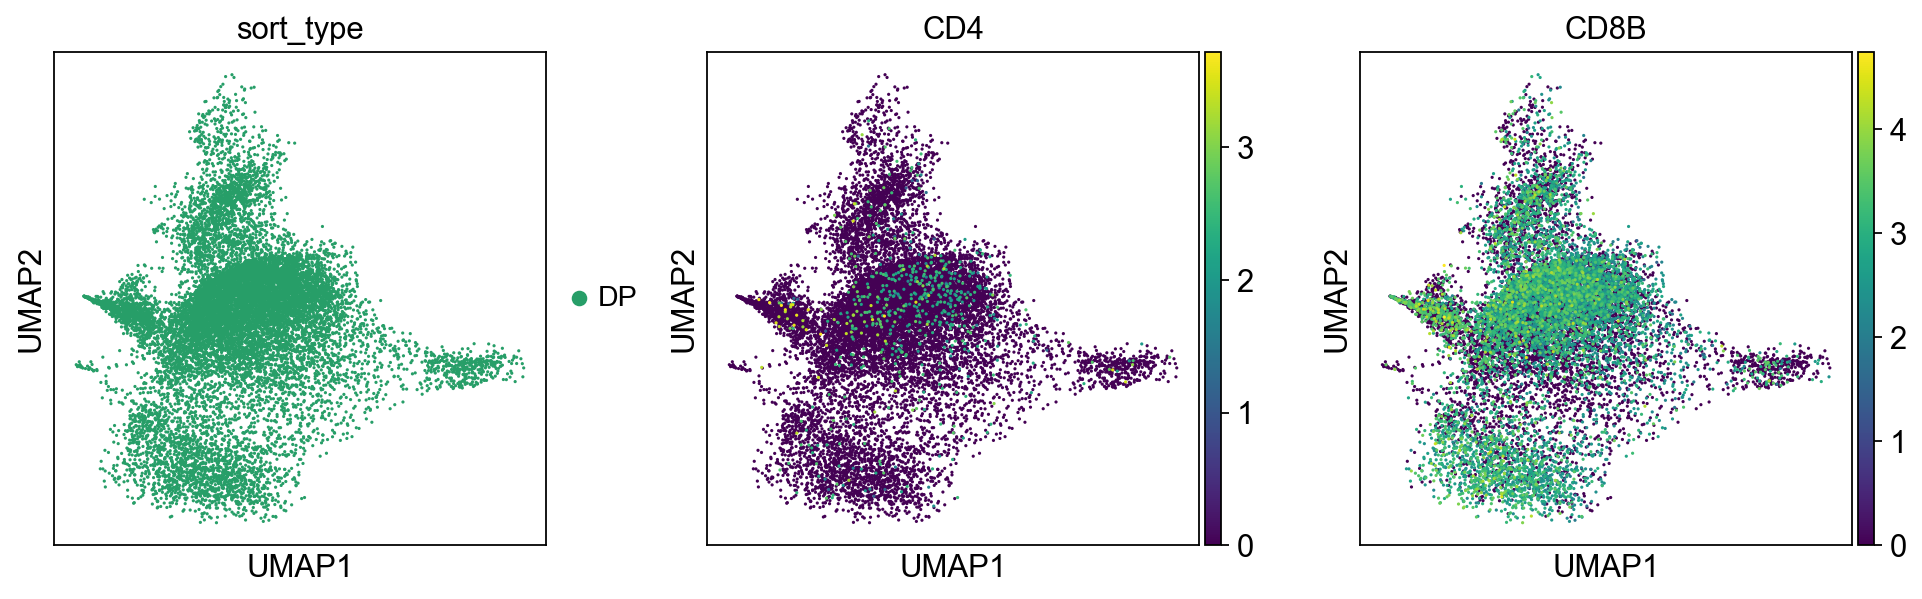

In [58]:
adata_DP = adata[adata.obs['sort_type'] == "DP"]
adata_DP.obs
sc.pl.umap(adata_DP, color = ["sort_type", "CD4", "CD8B"], ncols = 3)

## expression of CD4 in general isn't great... But most of the DP sorted cells seem to sit closer to the middle where CD4-sorted cells are.

## Another way of plotting... 

### How would you visualise different T cell marker genes? 
#### Earlier, we saw genes CD4, CD8B. What are other cell surface markers found on T cells? 

Some hints from https://www.nature.com/articles/s41467-019-12464-3

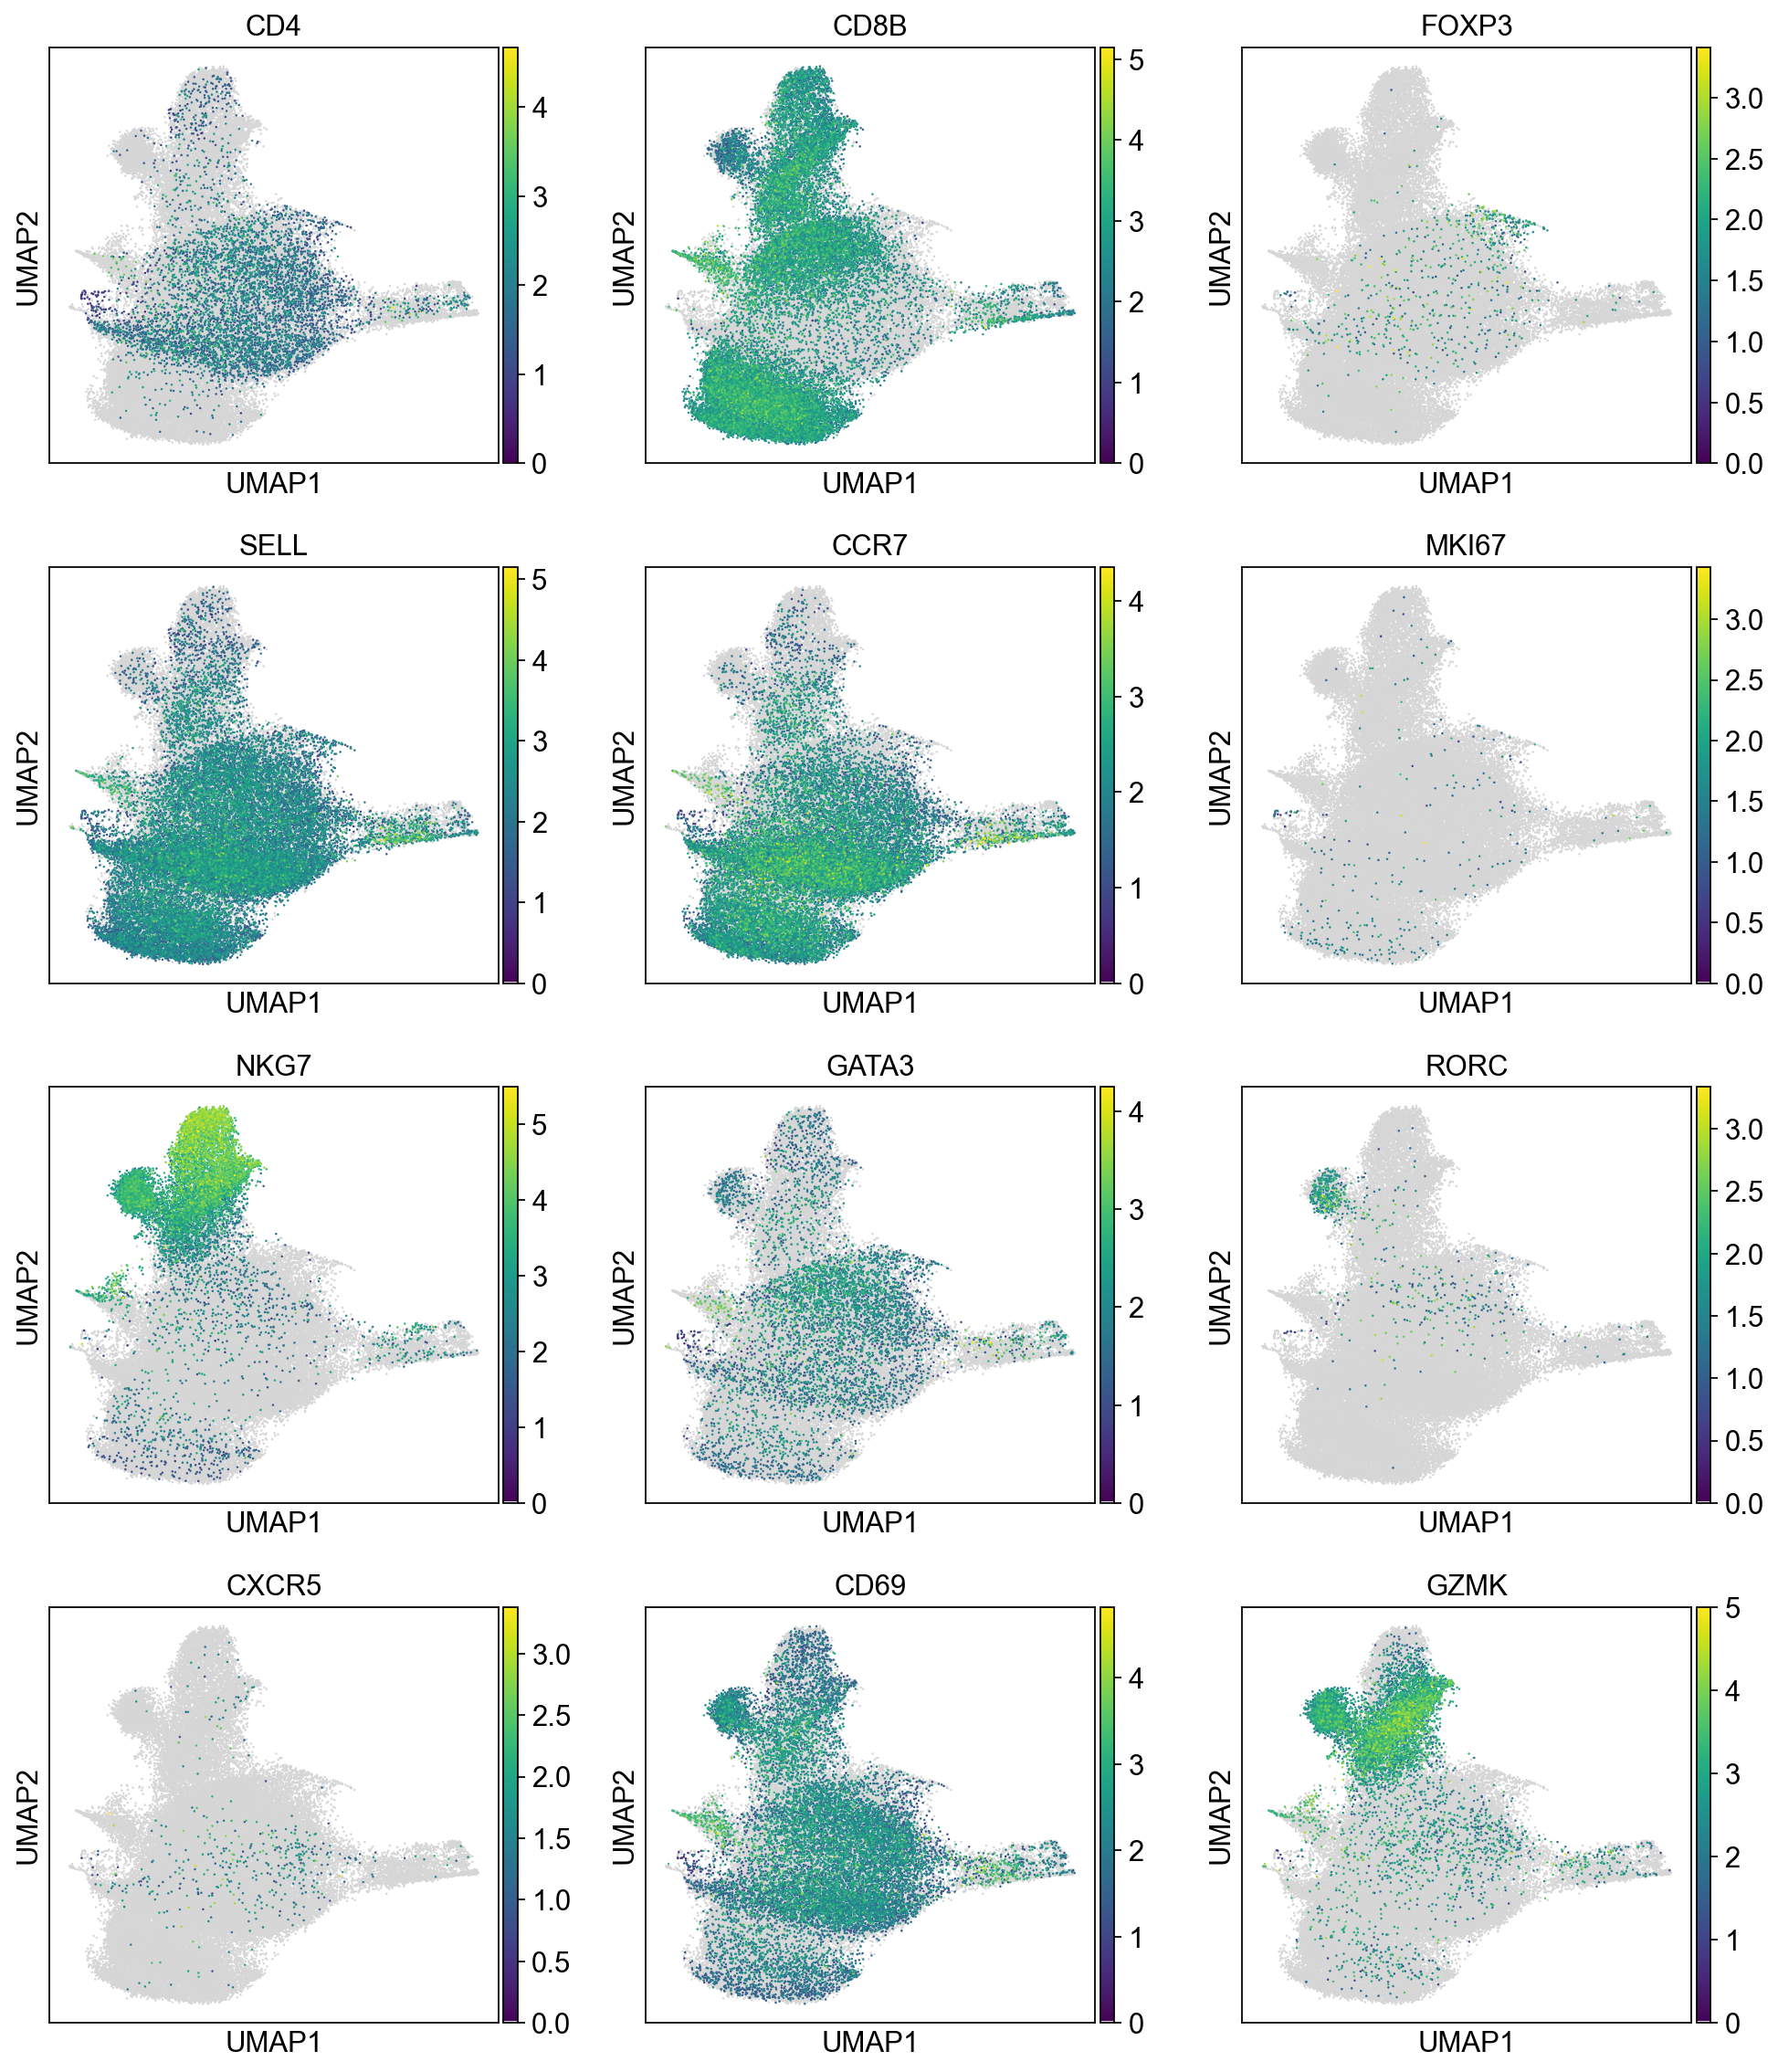

In [59]:
sc.pl.umap(
    adata,
    color=["CD4", "CD8B", "FOXP3", "SELL", "CCR7", "MKI67", "NKG7", "GATA3", "RORC",
    "CXCR5", "CD69", "GZMK"],
    ncols=3,
    size=5,
    color_map=tools.cmp(),
)

In [60]:
adata.uns['log1p']
# {'base': None}

{'base': None}

Let's just save this... 

In [61]:
adata.write_h5ad("adata_processed_v2_MS_070823.h5ad", compression="gzip")

# 4. Batch Correction

##### There are a number of methods or algorithms that can combine diverse datasets and remove batch effects. We call that batch correction.

##### Batch balanced k nearest neighbour (BBKNN) is a fairly recent algorithm that is "one to two orders of magnitude faster than existing methods". More info: https://academic.oup.com/bioinformatics/article/36/3/964/5545955

##### BBKNN is batch effect removal tool that can be directly used in the scanpy workflow. 
##### It serves as an alternative to scanpy.pp.neighbors(), with both functions creating a neighbour graph for subsequent use in clustering, pseudotime and UMAP visualisation

## Batch correction with BBKNN

Running BBKNN 
https://scanpy-tutorials.readthedocs.io/en/latest/integrating-data-using-ingest.html

To run BBKNN, we need to start from pre-harmony object so import the file you have previously saved in:

In [62]:
adata = sc.read_h5ad("adata_processed_v2_MS_070823.h5ad")

In [63]:
adata.uns['log1p']

{}

Note it is empty now - this happens after the save h5ad step! https://github.com/scverse/scanpy/issues/2239

##### Install bbknn if you haven't:

In [64]:
# !pip install bbknn

Note: you may need to restart the kernel to use updated packages.


#### Apply bbknn to batch correct by sample 

In [65]:
sc.external.pp.bbknn(adata, batch_key = 'sample')

In [66]:
adata.uns['log1p']
# if you don't use the saved h5ad, but just continues... output: 'base' : None

{}

### Plotting the neighbourhood graph using bbknn

Note: we skip neighbourhood construction step as bbknn does that already
min_dist : float (default: 0.5). 

The effective minimum distance between embedded points. Smaller values will result in a more clustered/clumped embedding where nearby points on the manifold are drawn closer together, while larger values will result on a more even dispersal of points. The value should be set relative to the spread value, which determines the scale at which embedded points will be spread out. 

The default in the umap-learn package is 0.1. Try inserting different values to find your personal preference in the next few steps through visualisation.

#### So as how would you normally embed the neighborhood graph using UMAP with scanpy and then insert a min_dist of your choice?

In [ ]:
sc.tl.umap(adata, min_dist = 0.3) 

#### How would you visualise this across the three main T cell types? You can do a loop too

In [ ]:
for g in ['CD4', 'CD8', 'DP']:
    sc.pl.umap(
    adata,
    color=['sort_type'],
    groups = g,
)

#### How would you visualise by donor? Create a different loop this time and plot the UMAP:

In [ ]:
adata.obs['donor'] #L01, P01, V, WY
# visualise this.. 
for d in ['L01', 'P01', 'V','WY']:
    sc.pl.umap(
    adata,
    color=['donor'],
    groups = d
)

### Inspect the changes post-batch correction.

#### Now how do you sort for CD4 T cells? And then display them in UMAPs?

In [ ]:
adata_CD4 = adata[adata.obs['sort_type'] == "CD4"]
adata_CD4.obs
sc.pl.umap(adata_CD4, color = ["sort_type", "donor", "CD4", "CD8B"], ncols = 4, size = 20)

### Inspect changes post-batch correction

#### Now how do you sort for CD8 T cells? And then display them in UMAPs?

In [ ]:
adata_CD8 = adata[adata.obs['sort_type'] == "CD8"]
adata_CD8.obs
sc.pl.umap(adata_CD8, color = ["sort_type", "donor", "CD4", "CD8B"], ncols = 4, size = 20)

#### Now how do you sort for DP T cells? And then display them in UMAPs?

In [ ]:
adata_DP = adata[adata.obs['sort_type'] == "DP"]
adata_DP.obs
sc.pl.umap(adata_DP, color = ["sort_type", "donor", "CD4", "CD8B"], ncols = 4, size = 20)

Why is there are there CD4-sorted T cells also found in the CD8 cluster, but with low expression of CD4?? 

Let's visualise some QC metrics..   Nothing seem too out of the blue. 
Maybe downstream, if needed can just recluster and compare. The tail bit of umap seems to be a bit higher in mito content. 


In [ ]:
adata.obs
# n_genes_by_counts, total_cpunts, pct_count_mt, filter_rna

sc.pl.umap(
    adata,
    color=['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
    ncols=3,
    size=20,
    color_map=tools.cmp(),
)

#### How do you visualize the expression of common T cell markers across the entire data set in three columns?

Hint: Using the same markers as we did in [62]

In [ ]:
sc.pl.umap(
    adata,
    color=["CD4", "CD8B", "FOXP3", "SELL", "CCR7", "MKI67", "NKG7", "GATA3", "RORC",
    "CXCR5", "CD69", "GZMK"],
    ncols=3,
    size=5,
    color_map=tools.cmp(),
)

### Comments: 
These cells are not too different transcriptionally - because they are simply T cells? 
Also, umap seems to cluster more based on "activation status" and then "cell lineage"
But we can see that most of the DP cells are located within the middle where the bulk of CD4 cells are. 

## Save post-BBKNN

In [ ]:
adata.write_h5ad("adata_processed_v2_BBKNN_MS_100823.h5ad", compression="gzip")

In [ ]:
sc.external.pp.bbknn(adata, batch_key = 'donor')

In [ ]:
sc.tl.umap(adata, min_dist = 0.3)

How do you visualise CD4, CD8 and DP T cells by donor post-BBKNN batch correction?

In [ ]:
for g in ['CD4', 'CD8', 'DP']:
    sc.pl.umap(
    adata,
    color=['sort_type'],
    groups = g,
)

In [ ]:
How to visualise individual UMAPS based of each donor type?

In [ ]:
adata.obs['donor'] #L01, P01, V, WY

for d in ['L01', 'P01', 'V','WY']:
    sc.pl.umap(
    adata,
    color=['donor'],
    groups = d
)

Not much difference... So just go back to previous

# Read in Data post-BBKNN

In [ ]:
adata = sc.read_h5ad("adata_processed_v2_BBKNN_MS_100823.h5ad")

In [ ]:
sc.tl.umap(adata, min_dist = 0.3)

#### Visualise this, you can do it with a loop too: 

In [ ]:
for g in ['CD4', 'CD8', 'DP']:
    sc.pl.umap(
    adata,
    color=['sort_type'],
    groups = g,
    size = 20
)

### How do I view proportion of CD4 expression in CD8+ cells?

Hint: you can use a method of score_genes under scanpy. Then visualise the score by plotting the umap.

In [ ]:
sc.tl.score_genes(adata, gene_list= ['CD4', 'CD8B', 'CD8A'], score_name= 'CD4.CD8.score')

In [ ]:
sc.pl.umap(adata, color = 'CD4.CD8.score', size=10)

### Now that we've seen what a batch corrected data is visualised on a UMAP, let's compare it with the UMAP of our adata:
We'll name the previous non-batch corrected data as "preadata"

In [ ]:
preadata = sc.read_h5ad("adata_processed_v2_MS_070823.h5ad")

In [ ]:
sc.tl.umap(preadata, min_dist = 0.3)

In [ ]:
sc.tl.score_genes(preadata, gene_list= ['CD4', 'CD8B', 'CD8A'], score_name= 'CD4.CD8.score')

In [ ]:
sc.pl.umap(preadata, color = 'CD4.CD8.score', size=10)

### So can you see the difference in the UMAPs pre- and post-batch correction?

### Now, moving back to our batch corrected adata object, let's check the annotations of variables:

In [ ]:
adata.var

#### Next, let's use an existing CD4/CD8 gene set from Szabo et al. to score the expression of various CD4/CD8 markers on our dataset.
Read in the csv file and label it "szabo"

In [ ]:
szabo = pd.read_csv("../geneset/Szabo_T_cell_gene_modules.txt", sep = "\t")
szabo

#### Embed a score to the Szabo's "CD4/CD8" gene list and name the score as "CD4/CD8_geneset"

In [ ]:
sc.tl.score_genes(adata, gene_list = szabo["CD4/CD8"], score_name = "CD4/CD8_geneset")

# So if it scores higher = it is more CD4-like... 


In [ ]:
Plot the usual CD4, CD8 genes together with two other T cell markers: CD44 and CD27 which are involved in acquiring activation, whereas CD27 is high on naive cells and lost upon activation. 

In [ ]:
sc.pl.umap(adata, color = ["CD4/CD8_geneset", "sort_type", "CD4", "CD8B", "CD27", "CD44"], ncols = 3, size = 5)

It's a bit weird but the CD/CD8 marker expression doesn't fully coincide with the CD4/CD8 lineage of sorted identities. 

Let's do unsupervised clustering and see if there is any way we can understand CD4 vs CD8 on clusters. 

# 5. Redo UMAP

# Try running Leiden unsupervised clustering:

### Run leiden clustering with scanpy (BBKNN already has a neighbourhood construction step so can skip this)

In [ ]:
sc.tl.leiden(adata, resolution = 2.0)

#### Plot a UMAP and choose a resolution ("size") of 20 clusters:

Reference for what other types of resolution mean: 

resolution 1.0 (10 clusters), resolution 1.5 (12 clusters), resolution 1.8 (15 clusters), resolution 2.0 (16 clusters) - but looks heaps better!


In [ ]:
sc.pl.umap(adata, color = 'leiden', size = 20)

In [ ]:
# putting legend on top
sc.pl.umap(adata, color = 'leiden', legend_loc = 'on data', legend_fontoutline = 2, size = 10)

In [ ]:
### just getting how many cells are there per cluster
adata.obs.groupby(["leiden"]).apply(len)

Creating bar plot distribution per cluster

In [ ]:
import matplotlib.pyplot as plt

#  https://pbpython.com/pandas-crosstab.html
# basically, cross-tabbing relates to two columns/ series together... 

pd.crosstab(adata.obs['donor'], adata.obs['leiden'])

In [ ]:
########   generating it as frequency...
# axis : t specifies the axis along which the means are computed
# https://stackoverflow.com/questions/22149584/what-does-axis-in-pandas-mean
#   Usually axis=0 is said to be "column-wise" (and axis=1 "row-wise")

pd.crosstab(adata.obs['donor'], adata.obs['leiden']).apply(
    lambda r: r/r.sum() *100, axis = 1
)

##### Quick jump to see what axis = 0 or 1 works... 

data = {
    'A' : [1,2,3],
    'B' : [4,5,6],
    'C' : [7,8,9]
}

df = pd.DataFrame(data)

print(df)

column_sums = df.sum(axis = 0)
print(column_sums)

row_sums = df.sum(axis = 1)
print(row_sums)

In [ ]:
#### Creating a stacked bar
pd.crosstab(adata.obs['sort_type'], adata.obs['leiden']).apply(
    lambda r: r/r.sum() *100, axis = 1
).plot.bar(stacked = True)
plt.legend(bbox_to_anchor = (1, 0.5), loc = 'center left', frameon = False)
# bbox_to_anchor=(1, 0.5): This parameter specifies the position of the legend in relation to the axes. In this case, (1, 0.5) means the legend will be placed at the right side of the plot, and vertically centered (at 50% height of the plot).
#loc='center left': This parameter determines where the legend should be anchored within the bounding box specified by bbox_to_anchor. In this case, the legend will be positioned along the center-left edge of the bounding box.
#frameon=False: This parameter specifies whether to draw a frame around the legend. By setting it to False, you're indicating that the legend should not have a visible frame.

In [ ]:
### Quickly plot Violin plots for QC... 
sc.pl.violin(adata, ['total_counts', 'n_genes_by_counts', 'pct_counts_mt'], size = 0.1,
 groupby='leiden', multi_panel = True, rotation = 90)

#cluster 12 - a lot of mito genes, cluster 15 is basically non-existent!

In [ ]:
## check CD4/CD8 score over cluster.. - higher score = more CD4.. - cluster 2,3,4, 6,7,8, 11,13,14
sc.pl.matrixplot(adata, "CD4/CD8_geneset", groupby="leiden")

This is in line with UMAP structure governed mainly by activation etc... Whereas lineage of CD4/CD8 of sorted identities are not distinct in the UMAP. CD4-like cells tend to sit on the upper half!

In [ ]:
sc.pl.violin(adata, ['CD4', 'CD8A', 'CD8B'], size = 0.1,
 groupby='leiden', multi_panel = True, rotation = 90)

# 6. Refining clusters based on marker gene expression 
# (Manual way #1)

Using the Leiden clusters, rank the highly expressed genes for each cluster using a dot plot.
Try adding a new key to refine the number of clusters. Label it as "leiden_A"

In [ ]:
sc.tl.leiden(adata, key_added = "leiden_A")
sc.pl.umap(adata, color=['leiden', "leiden_A"], legend_fontoutline=2, legend_loc='on data')

In [ ]:
sc.tl.rank_genes_groups(adata,groupby='leiden_A', method='wilcoxon')

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata,n_genes=5,min_logfoldchange=0.5,standard_scale='var',color_map='viridis')

Now label each cluster with an annotation based on the most highly expressed genes while genes that are housekeeping or non-specific can be assigned to "Ambiguous" if they are not genes of interest.
Also consider the fraction of cells and their mean gene expression in tandem

You can also look at the genes in a tabular format for easier viewing. Still, use it in tandem with the dotplot above.

In [ ]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)

#### Now name the clusters based on the listed genes together with references to literature.

##### Notice that most of the clusters have lots of non-specific annd/or housekeeping genes that makes it hard to name the clusters. 

In [ ]:
# 0 - RP are all ribosomal genes - Ambiguous
# 1 - MALAT1: Cancer metastasis; LEF1 and FOXP1: lymphoid cell development. LEF1 is involved in the Wnt signaling pathway and lymphoid cell differentiation, while FOXP1 is a transcription factor important for B cell development.
# 2 - Mostly non-specific genes such as calcium-binding genes = Ambiguous
# 3 - NK cells
# 4 - RP are all ribosomal genes - Ambiguous
# 5 - RP are all ribosomal genes - Ambiguous
# 6 - Non-specific/non-coding genes - Ambiguous
# 7 - NK cell-dominant genes - NK cells
# 8 - smooth muscle, transcription factor, tumor suppressors - Ambiguous

If the above method had worked for example if we were to have a tissue sample that contains immune cells and stromal cells. 

We could create a cell marker dictionary that we will then used to label the above clusters (in the next line). 

So do not run the next few steps but understand that method does not work well in this case but could be better suited for another sample type.

In [ ]:
cellmarker_dict={
'T cell':['CD3D','CD44'],
'NK':['NCAM1','NCR1'], 
'Endothelial':['PECAM1','IGFBP2','LY6E'],
'Lymphatic endothelial':['CCL21','PDPN','LYVE1'],
'Proliferating Endothelial':['MKI67','STMN1'],
'Venous endothelial':['LEFTY1','EPHB4'],
'Arterial endothelial':['CXCL12','EPHB2'],
'Fibroblasts':['VIM','LUM','COL1A1'],
'Myofibroblasts':['MYH9','MYH10','MYH11','ACTA2','CALD1','TAGLN'],                 
}

In [ ]:
sc.pl.dotplot(adata, cellmarker_dict, groupby='leiden_A', 
              standard_scale='var',color_map='Blues')

In [ ]:
#To map the identified clusters to a cell type annotation label

celltypesannot= {
    '0':'Ambiguous',
    '1':'Pericytes',
    '2':'Inflammatory CAFs',
    '3':'Ambiguous',
    '4':'Inflammatory CAFs',
    '5':'Vascular CAFs',
    '6':'Inflammatory CAFs',
    '7':'Matrix CAFs',
}
# add a new '.obs'column called 'cell type' by mapping clusters to annotation using pandas 'map'function
adata.obs['cell type'] = adata.obs['leiden_A'].map(celltypesannot).astype('category')


In [ ]:
sc.pl.umap(adata, color='cell type', legend_loc='on data',
           frameon=False, legend_fontsize=7, legend_fontoutline=2)

In [ ]:
adata2=adata[adata.obs['cell type'].isin(['Pericytes','Matrix CAFs','Reticular CAFs','Inflammatory CAFs','Antigen-Presenting CAFs','Tumor-like CAFs','Vascular CAFs'])].copy()
sc.pl.umap(adata2,color='cell type')

In [ ]:
adata2.write('celltypes_annot_01.h5ad')

In [ ]:
adata2 = sc.read_h5ad('celltypes_annot_01.h5ad') #run this if reimporting

In [ ]:
adata2

So the above steps would be how you run a manual annotation and you can refine the clusters further using your newly labeled object "adata2"

# 7. Other ways of refining cluster annotations:

## Alternative method of cluster annotations: Automated Celltypist annotation 

### To run in the terminal

In [ ]:
!pip install celltypist
!celltypist --update-models

### First, write out the raw data for input for celltypist

In [ ]:
adata.raw.to_adata().write_h5ad("adata_processed_v2_BBKNN_MS_raw-for_celltypist_300823.h5ad", compression="gzip")

#### Quick note... Kelvin also did a comparison on the pre-batch-correction data, but since we are happy with batch correction.. just continue on.

### Make a directory for the output after running celltypist on our data

In [ ]:
!mkdir celltypist_bbknn


#### Run celltypist on our processed-BBKNN-batch corrected data and allow it to predict labels on each single cell with all the specifications needed. 

#### The labels will be given a variable name of "majority_voting"

In [ ]:
!celltypist --indata adata_processed_v2_BBKNN_MS_raw-for_celltypist_300823.h5ad --model Immune_All_Low.pkl --outdir celltypist_bbknn --majority-voting 

#### Import and label the object for predicted_labels.csv as "celltypistdf1" and set an index_col=0.

index_col: This is to allow you to set which columns to be used as the index of the dataframe. The default value is None, and pandas will add a new column start from 0 to specify the index column. It can be set as a column name or column index, which will be used as the index column.

#### Then run the new object

majority_voting: predicted labels after majority voting in local subclusters

In [ ]:
celltypistdf1 = pd.read_csv(
    "celltypist_bbknn/predicted_labels.csv", index_col=0
)
celltypistdf1

#### Check the columns of adata:

In [ ]:
adata.obs

#### Include the majority_voting data from celltypistdf1 in the adata - Label it as "celltypist_majority_voting"

In [ ]:
adata.obs["celltypist_majority_voting"] = pd.Series(celltypistdf1["majority_voting"])
adata.obs.info()

#### Check the columns that you've added the new column in correctly:

In [ ]:
adata.obs

#### Data can also be imported this way without "pd.Series" at the start - not sure what difference is!:

adata.obs["celltypist_majority_voting"] = celltypistdf1["majority_voting"]

#### Visualise the data via umap

##### Hint: color it by your new celltypist labels

In [ ]:
sc.pl.umap(adata, color=["celltypist_majority_voting"], size = 20)

### Plot distribution by sorting by cell type

In [ ]:
pd.crosstab(adata.obs['sort_type'], adata.obs['celltypist_majority_voting']).apply(
    lambda r: r/r.sum() *100, axis = 1
).plot.bar(stacked = True)
plt.legend(bbox_to_anchor = (1, 0.5), loc = 'center left', frameon = False)

### Plot a crosstab chart by sorting into CD4, CD8 and DP using the package matplotlib.pyplot:

In [ ]:
import matplotlib.pyplot as plt
pd.crosstab(
    adata.obs["celltypist_majority_voting"],
    adata.obs["sort_type"],
).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

### Plot a UMAP and colour it by leiden and place the legend 'on data'

In [ ]:
sc.pl.umap(adata, color = 'leiden', legend_loc = 'on data', legend_fontoutline = 2, size = 10)

In [ ]:
pd.crosstab(adata.obs['leiden'], adata.obs['celltypist_majority_voting']).apply(
    lambda r: r/r.sum() *100, axis = 1
).plot.bar(stacked = True)
plt.legend(bbox_to_anchor = (1, 0.5), loc = 'center left', frameon = False)

At the end of all these, a theme has emerged: 
CD4 sorted cells are mostly "naive"-like
CD8 sorted cells are mostly "cytotoxic"
DP are more related to CD4s, but have some differentianted Th cells

#### But if this is the case, none of the current annotation will have DP cells as a whole - the question is are DP cells more related to CD4/CD8 cells. So... we will group all DP cells and annotate them as DP cells without further clustering etc.

#### So next, create a new column in adata called  "celltypist_annotation":

In [ ]:
adata.obs['celltypist_annotation'] = adata.obs['celltypist_majority_voting']
adata.obs.info()

In [ ]:
# convert from category to object so I can play around... 
adata.obs['celltypist_annotation'] = adata.obs['celltypist_annotation'].astype('object')
adata.obs.info()


In [ ]:
### This function works only on object but NOT category! 
for i in adata.obs.index:
    if adata.obs.at[i, 'sort_type'] == 'DP':
        adata.obs.at[i, 'celltypist_annotation'] = 'DP'
adata.obs.info()

In [ ]:
adata.obs

### Plot a umap and color it by the celltypist annotations.

In [ ]:
sc.pl.umap(adata, color = ["celltypist_annotation"], size = 20, ncols = 2)

## Stop here.... and save and do marker genes etc.... 

In [ ]:
adata.write_h5ad("adata_processed_v2_BBKNN_celltypist_MS_300823.h5ad", compression="gzip")

In [ ]:
adata = sc.read_h5ad("adata_processed_v2_BBKNN_celltypist_MS_300823.h5ad")

## Finding Marker Genes Manually

In [ ]:
adata

In [ ]:
adata.uns['log1p']
# if you don't use the saved h5ad data, output is still: 'base': none

In [ ]:
#### NOTE: This step is only necessary if you are running from any of the SAVED H5ad object, because adata.uns['log1p'] is an empty dictionary! So will trigger error when running any DGEA.. 
adata.uns.pop("log1p") 
# pop is used to remove and return an element from a collection (if assigned to something), here it is to simply remove log1p 


In [ ]:
adata

In [ ]:
sc.tl.rank_genes_groups(adata, groupby = 'leiden', method = 'wilcoxon')

### Plot the above out:

In [ ]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False) #sharey means each panel 

### Plot it out as dotplot:

In [ ]:
sc.pl.rank_genes_groups_dotplot(
    adata, n_genes=10, standard_scale = 'var', color_map = 'viridis',
    min_logfoldchange = 1
)

### Let's try to plot my marker genes of "CD4", "CD8B", "FOXP3", "CTLA4", "SELL", "CCR7", "MKI67", "NKG7", "GATA3", "RORC", "CXCR5", "CD69", "GZMK", "BCL6", "TRAV1-2" - label this set of genes as "my_genes", and plot it as a dotplot

In [ ]:
my_genes = ["CD4", "CD8B", "FOXP3", "CTLA4", "SELL", "CCR7", "MKI67", "NKG7", "GATA3", "RORC", "CXCR5", "CD69", "GZMK", "BCL6", "TRAV1-2"]
sc.pl.dotplot(adata, var_names= my_genes, groupby= 'leiden', color_map = 'viridis')

### Plot Violin plots for QC using the stacked_violin function:

In [ ]:
sc.pl.stacked_violin(adata, my_genes, groupby='leiden', rotation=90, row_palette='viridis', colorbar_title='median expression');

### Plot a stacked_violin chart again but groupby as 'celltypist_annotation'

In [ ]:
sc.pl.stacked_violin(adata, my_genes, groupby='celltypist_annotation', rotation=90, row_palette='viridis', colorbar_title='median expression');

### Show the top 10 ranked genes for each cluster as a dataframe using the 'rank_genes_groups' function

In [ ]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)   

### Plot the umap and color by 'leiden' and set a size of 20:

In [ ]:
sc.pl.umap(adata, color = 'leiden', size = 20)

# cluster 0: ribosomal, resting
# cluster 1: ribosomal
# cluster 2: S100A4, S100A11 etc... 
# cluster 3: TCM? 
# cluster 4: S100A4, S100A11, ITGB1, VIM... 
# cluster 5: CD8 ribosomal, rest?
# clyster 6: cytotoxic
# clluster 7: cytotoxic
# cluster 8: ???
# cluster 9: ribosomal
# cluster 10: BCOR? JUNB?
# cluster 11: cytotoxic, TRAV1-2??
# cluster 12: mito -high
#cluster 13: a few foxp-proteins
# cluster 14: proliferative?? 


### Redo the above steps with celltypist_annotation:

In [ ]:
sc.tl.rank_genes_groups(adata, groupby = 'celltypist_annotation', method = 'wilcoxon')

### Plot it out as dotplot with rank_genes_groups

In [ ]:
sc.pl.rank_genes_groups_dotplot(
    adata, n_genes=10, standard_scale = 'var', color_map = 'viridis',
    min_logfoldchange = 1
)

### Plot violin plots for QC with 'my_genes':

In [ ]:
my_genes = ["CD4", "CD8B", "FOXP3","IL2RA", "CTLA4", "GZMK", "NKG7", "CCL5", "SELL", "CCR7", "CD44", "CD27", "TRAV1-2", "KLRG1", "CX3CR1", "CD69", "ITGA1", "CXCR6"]
sc.pl.stacked_violin(adata, my_genes, groupby='celltypist_annotation', rotation=90, row_palette='viridis', colorbar_title='median expression');

### Plot umap with clusters coloured by celltypist_annotation

In [ ]:
sc.pl.umap(adata, color = 'celltypist_annotation', size = 10)

### Show the top 10 ranked genes for each cluster as a dataframe using 'rank_genes_groups'

In [ ]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10) 

# This marks the end of the tutorial. Good job!